In [1]:
!pip install -q datasets transformers librosa jiwer accelerate
!pip install -U datasets transformers accelerate evaluate

from google.colab import drive
from huggingface_hub import notebook_login

drive.mount("/content/drive")
notebook_login()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 96.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 125.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 89.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 52.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 43.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 105.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 31.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
from datasets import load_dataset, Dataset
from itertools import islice

# 학습용 (train split)
ko_train = list(islice(load_dataset("mozilla-foundation/common_voice_13_0", "ko", split="train", streaming=True), 100))
en_train = list(islice(load_dataset("mozilla-foundation/common_voice_13_0", "en", split="train", streaming=True), 100))
ja_train = list(islice(load_dataset("mozilla-foundation/common_voice_13_0", "ja", split="train", streaming=True), 100))
de_train = list(islice(load_dataset("mozilla-foundation/common_voice_13_0", "de", split="train", streaming=True), 100))

train_dataset = Dataset.from_list(ko_train + en_train + ja_train + de_train)

# 검증용 (validation split - streaming 적용, 개수 제한)
ko_val = list(islice(load_dataset("mozilla-foundation/common_voice_13_0", "ko", split="validation", streaming=True), 100))
en_val = list(islice(load_dataset("mozilla-foundation/common_voice_13_0", "en", split="validation", streaming=True), 100))
ja_val = list(islice(load_dataset("mozilla-foundation/common_voice_13_0", "ja", split="validation", streaming=True), 100))
de_val = list(islice(load_dataset("mozilla-foundation/common_voice_13_0", "de", split="validation", streaming=True), 100))

val_dataset = Dataset.from_list(ko_val + en_val + ja_val + de_val)

# 테스트용 (test split - streaming 적용, 개수 제한)
from itertools import islice

ko_test = list(islice(load_dataset("mozilla-foundation/common_voice_13_0", "ko", split="test", streaming=True), 100))
en_test = list(islice(load_dataset("mozilla-foundation/common_voice_13_0", "en", split="test", streaming=True), 100))
ja_test = list(islice(load_dataset("mozilla-foundation/common_voice_13_0", "ja", split="test", streaming=True), 100))
de_test = list(islice(load_dataset("mozilla-foundation/common_voice_13_0", "de", split="test", streaming=True), 100))

test_dataset = Dataset.from_list(ko_test + en_test + ja_test + de_test)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/14.7k [00:00<?, ?B/s]

common_voice_13_0.py:   0%|          | 0.00/8.18k [00:00<?, ?B/s]

languages.py:   0%|          | 0.00/3.65k [00:00<?, ?B/s]

release_stats.py:   0%|          | 0.00/65.4k [00:00<?, ?B/s]

The repository for mozilla-foundation/common_voice_13_0 contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/mozilla-foundation/common_voice_13_0.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


Reading metadata...: 192it [00:00, 696.43it/s]
Reading metadata...: 1013968it [00:25, 39818.63it/s]
Reading metadata...: 7071it [00:00, 21082.93it/s]
Reading metadata...: 540437it [00:13, 40114.06it/s]
Reading metadata...: 105it [00:00, 392.86it/s]
Reading metadata...: 16372it [00:00, 28172.63it/s]
Reading metadata...: 4961it [00:01, 3566.04it/s]
Reading metadata...: 16143it [00:00, 43786.22it/s]
Reading metadata...: 131it [00:00, 514.34it/s]
Reading metadata...: 16372it [00:01, 12076.08it/s]
Reading metadata...: 4961it [00:00, 16912.05it/s]
Reading metadata...: 16143it [00:00, 42444.42it/s]


In [3]:
from transformers import WhisperProcessor, WhisperForConditionalGeneration

checkpoint = "openai/whisper-base"
processor = WhisperProcessor.from_pretrained(checkpoint)
model = WhisperForConditionalGeneration.from_pretrained(checkpoint)
model.config.forced_decoder_ids = None
model.config.suppress_tokens = []

preprocessor_config.json:   0%|          | 0.00/185k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/283k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/836k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.48M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/494k [00:00<?, ?B/s]

normalizer.json:   0%|          | 0.00/52.7k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/34.6k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.19k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.98k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/290M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/3.81k [00:00<?, ?B/s]

In [4]:
def prepare_dataset(example):
    audio = example["audio"]
    example["input_features"] = processor.feature_extractor(audio["array"], sampling_rate=16000).input_features[0]
    example["labels"] = processor.tokenizer(example["sentence"]).input_ids
    return example

processed_dataset_train = train_dataset.map(prepare_dataset, remove_columns=train_dataset.column_names)
processed_dataset_val = val_dataset.map(prepare_dataset, remove_columns=val_dataset.column_names)
processed_dataset_test = test_dataset.map(prepare_dataset, remove_columns=test_dataset.column_names)


Map:   0%|          | 0/400 [00:00<?, ? examples/s]

Map:   0%|          | 0/400 [00:00<?, ? examples/s]

Map:   0%|          | 0/400 [00:00<?, ? examples/s]

In [5]:
from dataclasses import dataclass
from typing import Any, Dict, List, Union
import torch

@dataclass
class DataCollatorSpeechSeq2SeqWithPadding:
    processor: Any
    padding: Union[bool, str] = True

    def __call__(self, features: List[Dict[str, Union[List[int], torch.Tensor]]]) -> Dict[str, torch.Tensor]:
        input_features = [{"input_features": f["input_features"]} for f in features]
        label_features = [{"input_ids": f["labels"]} for f in features]
        batch = self.processor.feature_extractor.pad(input_features, return_tensors="pt")
        labels_batch = self.processor.tokenizer.pad(label_features, return_tensors="pt")
        labels = labels_batch["input_ids"].masked_fill(labels_batch.attention_mask.ne(1), -100)
        batch["labels"] = labels
        return batch

data_collator = DataCollatorSpeechSeq2SeqWithPadding(processor=processor)


In [6]:
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(
    output_dir="/content/drive/MyDrive/WhisperCheckpoints/run_base_lr1",
    per_device_train_batch_size=4,
    learning_rate=1e-5,
    num_train_epochs=3,
    logging_steps=10,
    save_strategy="epoch",
    fp16=True,
    report_to="none"
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=processed_dataset_train,
    tokenizer=processor,
    data_collator=data_collator
)

<ipython-input-6-2628c4d24117>:14: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [7]:
trainer.train()

Passing a tuple of `past_key_values` is deprecated and will be removed in Transformers v4.43.0. You should pass an instance of `EncoderDecoderCache` instead, e.g. `past_key_values=EncoderDecoderCache.from_legacy_cache(past_key_values)`.


Step,Training Loss
10,8.489100
20,7.215100
30,6.175900
40,5.372300
50,4.986800
60,4.604700
70,4.698300
80,4.441100
90,4.576400
100,4.183000


/usr/local/lib/python3.11/dist-packages/transformers/modeling_utils.py:3339: UserWarning: Moving the following attributes in the config to the generation config: {'max_length': 448, 'suppress_tokens': [], 'begin_suppress_tokens': [220, 50257]}. You are seeing this warning because you've set generation parameters in the model config, as opposed to in the generation config.
  warnings.warn(


TrainOutput(global_step=300, training_loss=4.190165430704752, metrics={'train_runtime': 175.9322, 'train_samples_per_second': 6.821, 'train_steps_per_second': 1.705, 'total_flos': 7.7831995392e+16, 'train_loss': 4.190165430704752, 'epoch': 3.0})

In [8]:
save_path = "/content/drive/MyDrive/WhisperCheckpoints/run_base_lr1"
model.save_pretrained(save_path)
processor.save_pretrained(save_path)

[]

In [9]:
import torch
from jiwer import wer
from tqdm import tqdm

lang_list = ["ko", "en", "ja", "de"]
lang_wer_results = {}

for lang in lang_list:
    print(f"🌍 Language: {lang}")
    lang_data = [x for x in val_dataset if x["locale"] == lang]

    predictions, references = [], []

    for sample in tqdm(lang_data):
        input_features = processor.feature_extractor(
            sample["audio"]["array"], sampling_rate=16000, return_tensors="pt"
        ).input_features.to(model.device)

        decoder_ids = processor.get_decoder_prompt_ids(language=sample["locale"], task="transcribe")
        model.config.forced_decoder_ids = decoder_ids

        with torch.no_grad():
            predicted_ids = model.generate(input_features)

        transcription = processor.batch_decode(predicted_ids, skip_special_tokens=True)[0]
        predictions.append(transcription)
        references.append(sample["sentence"])

        print(f"🔹 Predicted: {transcription}")
        print(f"🔸 Reference: {sample['sentence']}")

    score = wer(references, predictions)
    lang_wer_results[lang] = score
    print(f"✅ {lang.upper()} WER: {score:.4f}")


🌍 Language: ko


  0%|          | 0/100 [00:00<?, ?it/s]Due to a bug fix in https://github.com/huggingface/transformers/pull/28687 transcription using a multilingual Whisper will default to language detection followed by transcription instead of translation to English.This might be a breaking change for your use case. If you want to instead always translate your audio to English, make sure to pass `language='en'`.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
  1%|          | 1/100 [00:05<09:13,  5.59s/it]

🔹 Predicted:  کیا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہ
🔸 Reference: 그와 동시에 애상적이던 기분은 구름과 같이 흩어지고 안개처럼 스러졌다.


  2%|▏         | 2/100 [00:10<08:29,  5.20s/it]

🔹 Predicted:  کیا کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ

  3%|▎         | 3/100 [00:11<05:00,  3.09s/it]

🔹 Predicted:  ہمیں گے ہیں کہ ہمیں ان்கும் செல்லாம் என்று நில்லையும் செல்லாம்.
🔸 Reference: 의사에게 죽음의 선고를 받은 줄도 모르는 영신은 주사 기운에 조금 의식을 회복하였다.


  5%|▌         | 5/100 [00:11<02:06,  1.34s/it]

🔹 Predicted:  کیوں نے 그곳의 뱀에 뱀히 뱀히 뱀히 뱀다.
🔸 Reference: 무릇 경영은 의논함으로 성취하나니 모략을 베풀고 전쟁할지니라
🔹 Predicted:  ہمیں گی ہے
🔸 Reference: 아니다 결코 아니다.


  6%|▌         | 6/100 [00:11<01:27,  1.08it/s]

🔹 Predicted:  ہمیں گے ہیں
🔸 Reference: 공연한 소리 하지 말고 어서 가세.


  7%|▋         | 7/100 [00:16<03:26,  2.22s/it]

🔹 Predicted:  ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم
🔸 Reference: 선비는 받아 가지고 간난의 뒤를 따랐다.


  8%|▊         | 8/100 [00:17<02:32,  1.65s/it]

🔹 Predicted:  ہمیں گے ہیں کہ ہمیں ان்கும் போல்லையும் செல்லாம்.
🔸 Reference: 새벽배송보다도 로켓배송보다도 빠른 양자 배송 서비스를 오늘부터 시작합니다.


  9%|▉         | 9/100 [00:17<01:49,  1.20s/it]

🔹 Predicted:  ہمیں گے ہیں کہ ہمیں گے ہیں
🔸 Reference: 청하는 이쪽 노를 저으면서 소리를 지른다.


 10%|█         | 10/100 [00:17<01:26,  1.04it/s]

🔹 Predicted:  ہمیں گے ہیں کہ ہمیں ان்கும் போல்லையும் செல்லாம்.
🔸 Reference: 여러 사람의 앞으로 한 걸음 다가서며 그 검붉은 얼굴이 매우 긴장해진다.


 11%|█         | 11/100 [00:17<01:05,  1.37it/s]

🔹 Predicted:  ہمیں گے ہیں کہ ہمیں گے ہیں
🔸 Reference: 여전히 사건 파악을 못 하고 있는데도?


 12%|█▏        | 12/100 [00:18<01:01,  1.44it/s]

🔹 Predicted:  ہمیں گی ہے کہ ہمیں ایک کچھا کچھ کچھ کچھا کچھا کچھا کچھا کچھا کچھا کچھا
🔸 Reference: 즐겁고 재미있는 콘텐츠를 만들 작가를 모집합니다.
🔹 Predicted:  ہمیں گے ہیں کہ ہمیں گے ہیں
🔸 Reference: 이거리를 둘이서 걸어요.


 14%|█▍        | 14/100 [00:18<00:38,  2.25it/s]

🔹 Predicted:  ہمیں گے ہیں کہ ہمیں گے ہیں
🔸 Reference: 간난이는 생긋 웃어 보이며 머리를 흔들었다.


 15%|█▌        | 15/100 [00:19<00:33,  2.53it/s]

🔹 Predicted:  ہمیں گے ہیں کہ ہمیں گے ہیں کہ ہمیں گے ہیں
🔸 Reference: 무어가 무언지 분간할 수 없는 나는 이렇게 물었다.


 16%|█▌        | 16/100 [00:24<02:28,  1.77s/it]

🔹 Predicted:  ہمیں گی ہے کہ ہمیں ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک
🔸 Reference: 국무총리는 국회의 동의를 얻어 대통령이 임명한다.


 17%|█▋        | 17/100 [00:29<03:44,  2.71s/it]

🔹 Predicted:  کیا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہ
🔸 Reference: 부르짖으며 발길로 벽을 걷어차고 일어났다.


 18%|█▊        | 18/100 [00:29<02:42,  1.98s/it]

🔹 Predicted:  ہمیں گے ہیں کہ ہمیں گے ہیں کہ ہمیں گے ہیں
🔸 Reference: 나오는 줄 모르고 이런 말을 하고도 가슴이 선뜩하였다.


 19%|█▉        | 19/100 [00:34<03:50,  2.85s/it]

🔹 Predicted:  ہمیں گے وہ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ
🔸 Reference: 저 뒤에 동영상으로 주암동 사건 개요가 나올 겁니다.


 21%|██        | 21/100 [00:39<03:14,  2.46s/it]

🔹 Predicted:  ہمیں گی ہے کہ ہمیں ایک کچھا کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچ
🔸 Reference: 게으른 자는 말하기를 사자가 밖에 있은즉 내가 나가면 거리에서 찢기겠다 하느니라
🔹 Predicted:  ہمیں گی ہے
🔸 Reference: 그럼, 내일 오랍쇼니까?


 22%|██▏       | 22/100 [00:44<04:08,  3.19s/it]

🔹 Predicted:  ہمیں گے ہیں کہ ہمیں ایک کچھا کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچ
🔸 Reference: 그는 나를 밀쳐 버린 다음에 그 음보를 들고서 읽기 시작하였습니다.


 23%|██▎       | 23/100 [00:49<04:46,  3.73s/it]

🔹 Predicted:  کیا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہ
🔸 Reference: 그리고 이 집에서 옥점이를 어떻게 귀여워하는 것을 잠시간이라도 알 수가 있다.


 24%|██▍       | 24/100 [00:54<05:10,  4.08s/it]

🔹 Predicted:  کیا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہ
🔸 Reference: 아까까지 영신은 그 불을 얕은 하늘의 별들이 반짝이는 줄로만 알고있었다.


 25%|██▌       | 25/100 [00:54<03:39,  2.92s/it]

🔹 Predicted:  ہمیں گے ہیں کہ ہمیں گے ہیں.
🔸 Reference: 의심하는 마음과 한꺼번에 일어나는 것은 질투였다.


 26%|██▌       | 26/100 [00:59<04:21,  3.54s/it]

🔹 Predicted:  کیاہاں کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھ
🔸 Reference: 골김에 그저 이놈의 장인님, 하고 댓돌에다 메꼰코 우리 고향으로 내뺄까 하다가 꾹꾹 참고 말았다.


 27%|██▋       | 27/100 [00:59<03:11,  2.62s/it]

🔹 Predicted:  அگیز پیچھا کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ
🔸 Reference: 여보게 김첨지


 28%|██▊       | 28/100 [00:59<02:18,  1.92s/it]

🔹 Predicted:  ہمیں گے ہیں کہ ہمیں گے ہیں کہ ہمیں گے ہیں
🔸 Reference: 갑자기 튀어져 나오는 광포, 거기 연한 쾌미, 흥소


 29%|██▉       | 29/100 [01:00<01:45,  1.49s/it]

🔹 Predicted:  ہمیں گے ہیں کہ ہمیں کچھا کچھ ہم کچھ ہم کچھ ہم ہم ہمیں گے گا
🔸 Reference: 뜨거운 볕이 그의 전신을 후끈하게 하였다.


 30%|███       | 30/100 [01:00<01:19,  1.13s/it]

🔹 Predicted:  Върде е нещо е нещо, а върде е нещо.
🔸 Reference: 어리석은 자로 슬기롭게 하며 젊은 자에게 지식과 근신함을 주기 위한 것이니


 31%|███       | 31/100 [01:05<02:36,  2.27s/it]

🔹 Predicted:  Дърън не е върън в тън кън върън в тън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън в
🔸 Reference: 그 여학생인지 만지가 한참은 매우 때깔을 빼며 입술을 꼭 다문 채 김첨지를 거들떠보지도 않았다.


 32%|███▏      | 32/100 [01:05<01:54,  1.68s/it]

🔹 Predicted:  Върде елзирателно е на това елзирателно.
🔸 Reference: 한마디를 남기고 동혁은 구두징 소리를 뚜벅뚜벅 내며 골목 밖으로 나가 버린다.
🔹 Predicted:  کیا ہے
🔸 Reference: 스스로가 형편없다고 생각하지 말라.


 34%|███▍      | 34/100 [01:06<01:05,  1.00it/s]

🔹 Predicted:  Върде елзирателем с това елзирателем.
🔸 Reference: 하고 무엇을 알아챘다는 듯이 가만히 창하의 계속하는 말만 듣고 있다.


 36%|███▌      | 36/100 [01:06<00:41,  1.54it/s]

🔹 Predicted:  پیر کچھا کچھا کچھا کچھا کچھا کچھا
🔸 Reference: 권력을 휘두르는 그 정치인의 모습을 보며 대중들이 실망을 느꼈다.
🔹 Predicted:  کیا ہے؟
🔸 Reference: 그들이 집까지 왔을 때는 어슬어슬한 황혼이었다.


 37%|███▋      | 37/100 [01:11<01:55,  1.83s/it]

🔹 Predicted:  پیر کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا ک
🔸 Reference: 그 기회론을 주장하는 사람은, 유명한 음악 비평가 K씨였었다.


 38%|███▊      | 38/100 [01:12<01:35,  1.53s/it]

🔹 Predicted:  ஏற்குத்துவிட்டும் போல்லையும் போல்லையும் போல்லையும் ஓர்கள் ஓர்கள் அல்லவா?
🔸 Reference: 무대 앞에 서면 모두가 긴장하기 마련이야.
🔹 Predicted:  کیا ہے
🔸 Reference: 따라서 물 먹고 싶은 생각이 버쩍 들었다.


 40%|████      | 40/100 [01:13<00:58,  1.03it/s]

🔹 Predicted:  ஏன்றுவில்லையும் போக்கிறாய்விற்கும்.
🔸 Reference: 삼십 년이라는 세월이 흘렀습니다.


 42%|████▏     | 42/100 [01:18<01:24,  1.46s/it]

🔹 Predicted:  ஏற்குத்துவிட்டும் போல்லையும் போல்லையும் போல்லையும் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள்
🔸 Reference: 내일이나 모레나 그 어느 즐거운 날에
🔹 Predicted:  کیا ہے؟
🔸 Reference: 저녁이 되며 아침이 되니 이는 네째 날이니라


 43%|████▎     | 43/100 [01:18<01:07,  1.18s/it]

🔹 Predicted:  ஏன்று நில்லையும் போக்கிறாய் அல்லவா?
🔸 Reference: 밝은 달은 우리 가슴 일편단심일세


 44%|████▍     | 44/100 [01:23<02:03,  2.21s/it]

🔹 Predicted:  प्व़़़ लिव़ लिव़़ लिव़ लिव़ लिव़ लिव़ लिव़ लिव़ लिव़ लिव़ लिव़ लिव़ लिव़ लिव़ लिव़ लिव़ लिव़ लिव़ लिव़ लिव़ लिव़़ लिव़ लिव़ लिव़ लिव़़ लिव़ लिव़़ लिव़़ लिव़़ लिव़़ लिव़़ लिव़़ लिव़़ लिव़़़ लिव़़़ लिव़़़ लिव़़ लिव़़़ लिव़़़ लिव़़़ लिव़़ लिव़़़़ लिव़़़ लिव़़़़़़ लिव़़़़़़़ लिव़़़़़़़़़़़़़़़़�
🔸 Reference: 네가 나빠


 45%|████▌     | 45/100 [01:23<01:32,  1.68s/it]

🔹 Predicted:  Върде елзирателно е на това елзирателно.
🔸 Reference: 간난이는 여공이 들어가던 말까지 하려다가 이런 말은 좀더 기다려서 해주리라 하였다.


 46%|████▌     | 46/100 [01:28<02:21,  2.62s/it]

🔹 Predicted:  Въръв елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с т
🔸 Reference: 만일 제가 그대로 단결에 휙 뿌리치고 가보게.


 47%|████▋     | 47/100 [01:33<02:54,  3.29s/it]

🔹 Predicted:  Върде си от това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елз
🔸 Reference: 감독이 이렇게 와꾸를 돌리게 되면 으레 이십 전 벌금을 물게 되는 것이다.


 48%|████▊     | 48/100 [01:34<02:05,  2.42s/it]

🔹 Predicted:  Върде елзирателно е на това елзирателно.
🔸 Reference: 기적이 나타나기를 빌고 바라는 미신 비슷한 생각에 잠겨 보기도 또한 이번이 처음이다.


 49%|████▉     | 49/100 [01:39<02:42,  3.18s/it]

🔹 Predicted:  Въръртваме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елз
🔸 Reference: 비가 제법 장마 때처럼 주룩주룩 쏟아지기 시작한다.


 50%|█████     | 50/100 [01:39<01:54,  2.30s/it]

🔹 Predicted:  کیاہاں پہنے کیا ہے؟
🔸 Reference: 이래저래 영신은 근처 동리의 소위 재산가 계급에게는 인심을 몹시 잃었다.


 51%|█████     | 51/100 [01:44<02:31,  3.09s/it]

🔹 Predicted:  Въръв е не е не е е не е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е
🔸 Reference: 영신은 가슴속으로부터 치밀어 오는 울음을 참느라고 잇자국이 나도록 손가락을 깨문다.


 52%|█████▏    | 52/100 [01:49<02:56,  3.67s/it]

🔹 Predicted:  Върърт са елзират с тук върърт с тук върърт с тук върт с тук върт с тук върт с тук върт с тук върт с тук върт с тук върт с тук върт с тук върт с тук върт с тук върт с тук върт с тук върт с тук върт с тук върт с тук върт с тук върт с тук върт с тук върт с тук върт с тук върт с тук върт с тук върт с тук върт с тук върт с тук върт с тук върт с тук върт с тук върт с тук върт с тук върт с тук върт с тук върт с тук върт с тук върт с тук върт с тук върт с тук върт с тук върт с тук върт с тук върт с тук върт с тук върт с тук върт с тук върт с тук върт с тук върт с тук върт с тук върт с тук върт с тук върт с тук върт с тук върт с тук върт с тук върт с тук върт с тук върт с тук върт с тук върт
🔸 Reference: 따라서 인력거에 앉아 서울의 번잡한 도시를 향하여 달려오던 선비를 눈앞에 그려 보았다.


 53%|█████▎    | 53/100 [01:54<03:09,  4.04s/it]

🔹 Predicted:  Въръв е не е не е е не е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е
🔸 Reference: 그저 들어온 복도 박차 던져 내지 못해서 애쓰는 것이 아니고 무엇이냐.


 54%|█████▍    | 54/100 [01:54<02:13,  2.90s/it]

🔹 Predicted:  Добре елзива на това елзива.
🔸 Reference: 그가 그 나무 실과를 내게 주므로 내가 먹었나이다


 55%|█████▌    | 55/100 [01:54<01:35,  2.13s/it]

🔹 Predicted:  Върде елзирателно е на това елзирателно.
🔸 Reference: 네가 네 아내의 말을 듣고 내가 너더러 먹지 말라한 나무 실과를 먹었은즉


 56%|█████▌    | 56/100 [01:59<02:10,  2.97s/it]

🔹 Predicted:  Въръв е не е не е е не е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е
🔸 Reference: 병자의 몸은 벌써 싸늘하게 식었으며 얼굴이 파랗게 되었다.


 57%|█████▋    | 57/100 [02:04<02:33,  3.56s/it]

🔹 Predicted:  Въръв е не е не е е не е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е
🔸 Reference: 그러고 알 수 없는 괴로운 경우에서 저를 끌어내어 주셔요.


 58%|█████▊    | 58/100 [02:09<02:46,  3.96s/it]

🔹 Predicted:  Трън кън е не е е не е е е не е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е
🔸 Reference: 지금 바로 입금 가능해?


 61%|██████    | 61/100 [02:14<01:31,  2.34s/it]

🔹 Predicted:  Върде елзират са елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това е
🔸 Reference: 이리하여 주화조로서 탄주는 끝이 났습니다.
🔹 Predicted:  کیا ہے
🔸 Reference: 그는 오던 길을 다시 종로로 향해 갔다.
🔹 Predicted:  کیا ہے؟
🔸 Reference: 선비는 감독이 그를 부를 터이지 하고 하루 종일 가

 62%|██████▏   | 62/100 [02:19<01:52,  2.97s/it]

🔹 Predicted:  ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک
🔸 Reference: 옥점이는 어느 때나 신철이를 잊지 못하는 반면에 그만큼 더 미웠던 것이다.


 64%|██████▍   | 64/100 [02:24<01:32,  2.58s/it]

🔹 Predicted:  ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک
🔸 Reference: 그들은 풀기 없는 선비를 보며 감독에게서 단단한 나무람을 들은 듯하였다.
🔹 Predicted:  ہمیں گی ہے
🔸 Reference: 즐거운 날은

 65%|██████▌   | 65/100 [02:29<01:53,  3.24s/it]

🔹 Predicted:  کیا کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ

 66%|██████▌   | 66/100 [02:34<02:06,  3.71s/it]

🔹 Predicted:  ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک
🔸 Reference: 무기명으로 투표를 하는 데도 대필로 쓴 사람이 많았다.


 68%|██████▊   | 68/100 [02:39<01:33,  2.92s/it]

🔹 Predicted:  Върърт са елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзир
🔸 Reference: 대답을 듣고야 가겠다는 듯이 말똥말똥 쳐다본다.
🔹 Predicted: 
🔸 Reference: 배고픈데 지금 저녁 식사를 먹으면 너무 이를까?


 69%|██████▉   | 69/100 [02:44<01:48,  3.51s/it]

🔹 Predicted:  ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک
🔸 Reference: 그는 기침을 안 하려고 입을 꼭 다문 후에 숨을 쉬지 않았다.


 70%|███████   | 70/100 [02:49<01:58,  3.95s/it]

🔹 Predicted:  ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک
🔸 Reference: 동혁은 입술을 꽉 깨물고 원재의 뒤를 따라 묵묵히 논틀 밭틀을 걸었다.


 71%|███████   | 71/100 [02:54<02:02,  4.24s/it]

🔹 Predicted:  کیا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہ
🔸 Reference: 대한 사람 대한으로 길이 보전하세


 72%|███████▏  | 72/100 [02:59<02:04,  4.44s/it]

🔹 Predicted:  ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک
🔸 Reference: 여러 해 별러 오던 농우회의 회관을 지으려고 오늘 저녁에 그 지경을 닦는 것이다.


 73%|███████▎  | 73/100 [03:04<02:04,  4.59s/it]

🔹 Predicted:  ہمیں گی ہے کہ ہمیں ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک
🔸 Reference: 이웃에게 아첨하는 것은 그의 발 앞에 그물을 치는 것이니라


 74%|███████▍  | 74/100 [03:09<02:01,  4.69s/it]

🔹 Predicted:  ہمیں گی ہے کہ ہمیں ایک کچھا کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچ
🔸 Reference: 하더니 미리부터 허리를 구부리며 집 속으로 기어들어간다.


 75%|███████▌  | 75/100 [03:14<01:59,  4.78s/it]

🔹 Predicted:  ایک کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچ
🔸 Reference: 그와 동시에 기천의 가슴도 쿵 하고 울렸다.


 76%|███████▌  | 76/100 [03:19<01:55,  4.82s/it]

🔹 Predicted:  그는 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의 그의
🔸 Reference: 춘우는 모래 위에 앉아서 멀리 서울 쪽을 바라보고 앉아 있었다.


 77%|███████▋  | 77/100 [03:23<01:51,  4.85s/it]

🔹 Predicted:  ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک
🔸 Reference: 그리고 수없는 버스며 택시가 서로 경쟁을 하며 달려오고 달려간다.


 78%|███████▊  | 78/100 [03:28<01:47,  4.89s/it]

🔹 Predicted:  ایک کچھا کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ
🔸 Reference: 그는 그와 한 학급에 있는 인호였다.


 80%|████████  | 80/100 [03:33<01:09,  3.47s/it]

🔹 Predicted:  کیا کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ

 82%|████████▏ | 82/100 [03:39<00:49,  2.78s/it]

🔹 Predicted:  کیا کہ یہ اور وہ کہیں وہ وہ کہیں وہ وہ وہ کہیں وہ وہ کہیں وہ کہیں وہ کہیں وہ کہیں وہ کہیں وہ کہیں وہ کہیں وہ کہیں وہ کہیں وہ کہیں وہ کہیں وہ کہیں وہ کہیں وہ کہیں وہ کہیں وہ کہیں وہ کہیں وہ کہیں وہ کہیں وہ کہیں وہ کہیں وہ کہیں وہ کہیں وہ کہیں وہ کہیں وہ کہیں وہ کہیں وہ کہیں وہ کہیں وہ کہیں وہ کہیں وہ کہیں وہ کہیں وہ کہیں وہ کہیں وہ کہیں وہ کہیں وہ کہیں وہ کہیں وہ کہیں وہ کہیں وہ کہیں وہ کہیں وہ کہیں وہ کہیں وہ کہیں وہ کہیں وہ کہیں وہ کہیں وہ کہیں وہ کہیں وہ کہیں وہ کہیں وہ کہیں وہ کہیں وہ کہیں وہ کہیں وہ کہیں وہ کہیں وہ کہیں وہ کہیں وہ کہیں وہ کہیں وہ کہیں وہ کہیں وہ کہیں وہ کہیں وہ کہیں وہ کہیں وہ کہیں وہ کہیں وہ کہیں وہ کہیں وہ کہیں وہ کہیں وہ کہیں وہ کہیں وہ کہیں وہ کہیں وہ کہیں وہ کہیں وہ کہیں وہ کہیں وہ کہیں وہ کہیں وہ کہیں وہ کہیں وہ کہیں وہ کہیں وہ کہیں وہ کہیں وہ کہیں وہ کہیں وہ کہیں وہ کہیں وہ کہیں وہ کہیں وہ کہیں وہ کہیں وہ کہیں وہ کہیں وہ کہیں وہ کہیں وہ کہیں وہ کہیں وہ کہیں وہ کہیں وہ کہیں وہ کہیں وہ کہیں وہ کہیں وہ کہیں وہ کہیں وہ کہیں وہ کہیں وہ کہیں وہ کہیں 

 83%|████████▎ | 83/100 [03:39<00:34,  2.03s/it]

🔹 Predicted:  ہمیں گی ہے کہ ہمیں گی ہے کہ ہمیں گی ہے
🔸 Reference: 여호와 하나님이 에덴동산에서 그 사람을 내어 보내어


 84%|████████▍ | 84/100 [03:44<00:46,  2.88s/it]

🔹 Predicted:  کیا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہ
🔸 Reference: 정은배 씨와 마동혁 씨의 음악을 굉장히 다르다고 생각했거든요.


 85%|████████▌ | 85/100 [03:49<00:52,  3.48s/it]

🔹 Predicted:  ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک
🔸 Reference: 그때에 비단을 찢는 듯한 옥점의 조소가 들리는 듯하여 그는 얼핏 머리를 숙였다.


 86%|████████▌ | 86/100 [03:49<00:34,  2.50s/it]

🔹 Predicted:  کیاہاں پہنے کیا ہے؟
🔸 Reference: 웬일인지 선비가 울면 할멈은 번번이 따라 울곤 하였던 것이다.


 87%|████████▋ | 87/100 [03:54<00:41,  3.22s/it]

🔹 Predicted:  کیا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہ
🔸 Reference: 여기 편의점은 이십사시간 내내 열지는 않으니까, 필요한 게 있으면 미리 사두세요.


 88%|████████▊ | 88/100 [03:59<00:44,  3.73s/it]

🔹 Predicted:  ہمیں گی ہے کہ ہمیں ایک کچھا کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچ
🔸 Reference: 하고 창하는 춘우의 얼굴을 한참이나 물끄러미 들여다보았다.
🔹 Predicted:  ہمیں گی ہے کہ ہمیں گی ہے
🔸 Reference: 여동생이 점점 어머니를 닮았나 보다.


 90%|█████████ | 90/100 [04:04<00:33,  3.37s/it]

🔹 Predicted:  کیا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہ
🔸 Reference: 황금정에서는 용산으로 가는 듯한 월급쟁이들이 가득 들이몰리었다.


 91%|█████████ | 91/100 [04:09<00:34,  3.83s/it]

🔹 Predicted:  کیا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہ
🔸 Reference: 이것이 이 좋은 새 옷을 준 데 대한 흥선의 인사였다.


 92%|█████████▏| 92/100 [04:09<00:22,  2.82s/it]

🔹 Predicted:  کیا ہے کہ وہ کچھا کہیں ان்னுடையும் போல்லையும் போல்லை.
🔸 Reference: 보라 이 사람이 선악을 아는 일에 우리 중 하나 같이 되었으니


 93%|█████████▎| 93/100 [04:14<00:24,  3.48s/it]

🔹 Predicted:  ہمیں گی ہے کہ ہمیں کچھا کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ ک
🔸 Reference: 자, 여기 어떤 상점이 있다 합시다.


 94%|█████████▍| 94/100 [04:19<00:23,  3.91s/it]

🔹 Predicted:  ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک
🔸 Reference: 그때 그는 경찰서에서 고문받던 생각을 하고 소름이 쭉 끼쳤다.


 95%|█████████▌| 95/100 [04:24<00:21,  4.22s/it]

🔹 Predicted:  ہمیں گی ہے کہ ہمیں ایک کچھا کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچ
🔸 Reference: 일포는 못 들은 체하고 있다가 여전히 또 우벼 내서 맡아 보곤 하였다.


 96%|█████████▌| 96/100 [04:29<00:17,  4.46s/it]

🔹 Predicted:  ایک کچھا کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ
🔸 Reference: 자기의 마음을 제어하지 아니하는 자는 성읍이 무너지고 성벽이 없는 것 같으니라
🔹 Predicted:  کیا ہے
🔸 Reference: 그의 가슴에는 또다시 그 실뭉치가 욱 쓸어 올라온다.


 98%|█████████▊| 98/100 [04:29<00:04,  2.49s/it]

🔹 Predicted:  کیا私は、私のようなことを言うことを言う
🔸 Reference: 그럴 것이다.


 99%|█████████▉| 99/100 [04:34<00:03,  3.09s/it]

🔹 Predicted:  کیا کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ

100%|██████████| 100/100 [04:39<00:00,  2.80s/it]

🔹 Predicted:  ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک
🔸 Reference: 빈부가 섞여 살거니와 무릇 그들을 지으신 이는 여호와시니라
✅ KO WER: 14.0879
🌍 Language: en



  1%|          | 1/100 [00:00<00:15,  6.59it/s]

🔹 Predicted:  [Police sirens]
🔸 Reference: Again, small fast craft could attack and destroy a major warship.


  2%|▏         | 2/100 [00:00<00:34,  2.85it/s]

🔹 Predicted:  バックスクリームを取り出している
🔸 Reference: Both the Collected and Selected Poems were edited by Michael Rothenberg.


  3%|▎         | 3/100 [00:05<03:59,  2.47s/it]

🔹 Predicted:  پیر کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا ک
🔸 Reference: The residents moved to higher ground east of the original site.


  4%|▍         | 4/100 [00:06<02:44,  1.71s/it]

🔹 Predicted:  یا یا کھاہاں کھاہاں کھاہاں سے کھاہاں کھاہاں سے ہوں گیا
🔸 Reference: We need an end of all such matter.


  6%|▌         | 6/100 [00:06<01:23,  1.13it/s]

🔹 Predicted:  کیاہاں کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا
🔸 Reference: Bridget was born and raised in Ghana.
🔹 Predicted:  [Police sirens]
🔸 Reference: The crash is the deadliest aviation disaster in both Basque Country and Iberia history.


  7%|▋         | 7/100 [00:06<00:58,  1.59it/s]

🔹 Predicted:  کیا ہے؟
🔸 Reference: The pitched roof is clad in red tiles.


  8%|▊         | 8/100 [00:07<00:55,  1.67it/s]

🔹 Predicted:  Върърт са елзи с тъп си сега елзи с тъп са тъп са елзи.
🔸 Reference: Ski Gap Road leads southeast down the valley of South Poplar Run to Claysburg.


  9%|▉         | 9/100 [00:12<02:57,  1.95s/it]

🔹 Predicted:  Върън е не е не е е не е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е
🔸 Reference: Egyptian archeology is one of the branches of Egyptology.


 10%|█         | 10/100 [00:12<02:12,  1.47s/it]

🔹 Predicted:  Върън не е върген, а върген сега е не е върген.
🔸 Reference: It is also known as Bayo Canyon Road.


 11%|█         | 11/100 [00:17<03:43,  2.52s/it]

🔹 Predicted:  Върънън не е не е е не е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е
🔸 Reference: Other similar explanations include "shoally river", and "a rock ledge across a stream".


 12%|█▏        | 12/100 [00:22<04:45,  3.25s/it]

🔹 Predicted:  Върън не е е не е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е
🔸 Reference: Both ensembles wear highland dress patterned in their respective service tartans.


 14%|█▍        | 14/100 [00:23<02:25,  1.70s/it]

🔹 Predicted:  Върън не е върън в тън кън върън върън.
🔸 Reference: Other frames are shaped as chess pieces and geometric shapes.
🔹 Predicted:  2.0%
🔸 Reference: I wanted to sleep a little longer, he thought.


 16%|█▌        | 16/100 [00:28<02:39,  1.90s/it]

🔹 Predicted:  کیا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہ
🔸 Reference: The people with programs are seated in a very large, elegant room.
🔹 Predicted:  [Police sirens]
🔸 Reference: A man is grilling out in his backyard.


 17%|█▋        | 17/100 [00:32<03:51,  2.79s/it]

🔹 Predicted:  ہمیں گی ہے کہ ہمیں ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک
🔸 Reference: A large black dog is catching a Frisbee while a large brown dog follows shortly after.

 19%|█▉        | 19/100 [00:37<03:16,  2.42s/it]

🔹 Predicted:  ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک
🔸 Reference: Arctic rescue missions were mounted as necessary.
🔹 Predicted:  کیا ہے؟
🔸 Reference: 

 21%|██        | 21/100 [00:42<02:57,  2.24s/it]

🔹 Predicted:  پیر کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا ک
🔸 Reference: Its word order is the typical subject-object-verb.
🔹 Predicted:  [Music]
🔸 Reference: Gwen commits herself to restoring her relationship with her sister.


 24%|██▍       | 24/100 [00:43<01:09,  1.09it/s]

🔹 Predicted:  [Altimusikusus]
🔸 Reference: To which he replies: I thought she was your mother!
🔹 Predicted:  [Music]
🔸 Reference: Later that night Jill is kidnapped by gill men.
🔹 Predicted:  [Music]
🔸 Reference: Empty barrels make the most noise.


 25%|██▌       | 25/100 [00:48<02:19,  1.87s/it]

🔹 Predicted:  Върън не е върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън въ
🔸 Reference: When the carpet and the curtains caught fire, it was getting warm.


 26%|██▌       | 26/100 [00:52<03:12,  2.61s/it]

🔹 Predicted:  ہمیں گی ہے کہ ہمیں ایک کچھا کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچ
🔸 Reference: Bampur, where the ancient Bampur fort is located, is nearby.


 27%|██▋       | 27/100 [00:57<03:55,  3.22s/it]

🔹 Predicted:  சیزیزیزی کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا
🔸 Reference: The term "odango" in Japanese can refer to any variety of bun hairstyle.


 28%|██▊       | 28/100 [00:58<03:02,  2.53s/it]

🔹 Predicted:  ஏன்னுக்கும் போகிறாய்வில்லையும் போகிறாய்விற்கும் போகிறாய்விற்கும்.
🔸 Reference: The American Theatre Hall of Fame is located in the lobby.
🔹 Predicted:  کیا ہے
🔸 Reference: I've always wanted to do this!


 31%|███       | 31/100 [00:58<01:18,  1.13s/it]

🔹 Predicted:  [Police sirens]
🔸 Reference: Her opponent is Councilor Irwin Tieng.
🔹 Predicted:  [Pause]
🔸 Reference: Her work considers soil microbial ecology and the study of mycorrhizal fungi.


 33%|███▎      | 33/100 [01:03<01:45,  1.57s/it]

🔹 Predicted:  "Ai, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi
🔸 Reference: He is "City Press"s chief correspondent in Mpumalanga.
🔹 Predicted:  [Police sirens]
🔸 Reference: English dismissed these claims as being false.


 34%|███▍      | 34/100 [01:03<01:17,  1.18s/it]

🔹 Predicted:  [Police sirens]
🔸 Reference: Acquires Mase Westpac Limited, which is a member of the London Gold Fixing.


 36%|███▌      | 36/100 [01:08<01:43,  1.62s/it]

🔹 Predicted:  پیر کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا ک
🔸 Reference: For decades it was recognizable by the white, ladder-like snake on the building's roof.
🔹 Predicted:  ہمیں گی ہے
🔸 Reference: A mold is the counterpart to a cast.


 37%|███▋      | 37/100 [01:09<01:16,  1.21s/it]

🔹 Predicted:  அٹھاہاں پہنے کیا ہے
🔸 Reference: He also enjoys judo.


 38%|███▊      | 38/100 [01:13<02:22,  2.29s/it]

🔹 Predicted:  ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک
🔸 Reference: All artillery units wear the "Gun Sight" on their helmets.


 40%|████      | 40/100 [01:14<01:14,  1.24s/it]

🔹 Predicted:  Върде си елзират с тук върдето на тук.
🔸 Reference: I would not recommend publishing the article without the dataset.
🔹 Predicted:  [Police sirens]
🔸 Reference: What's the idea here?
🔹 Predicted:  [Music]
🔸 Reference: You got plenty of money?


 42%|████▏     | 42/100 [01:19<01:45,  1.83s/it]

🔹 Predicted:  ہمیں گی ہے کہ ہمیں ایک کچھا کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچ
🔸 Reference: There is no fighting against fate


 43%|████▎     | 43/100 [01:19<01:23,  1.46s/it]

🔹 Predicted:  கண்டும் போட்டுக்கிறாய் அல்லவா?
🔸 Reference: Nothing's the matter with me.


 44%|████▍     | 44/100 [01:24<02:11,  2.36s/it]

🔹 Predicted:  Въръв е не е това, както е е е на това е на това е на това е на това е на това е на това е на това е на това е на това е на това е на това е на това е на това е на това е на това е на това е на това е на това е на това е на това е на това е на това е на това е на това е на това е на това е на това е на това е на това е на това е на това е на това е на това е на това е на това е на това е на това е на това е на това е на това е на това е на това е на това е на това е на това е на това е на това е на това е на това е на това е на това е на това е на това е на това е на това е на това е на това е на това е на това е на това е на това е на това е на това е на това е на това е на това е на това е на това е на това е на това е на това е на това е на това е на това е на това е на това е на това е на това е на това е на това е на това е на това е на това е на това е на това е на това е на това е на това е на това е на това е на това е на това е на това е на това е на това е на то

 45%|████▌     | 45/100 [01:29<02:47,  3.04s/it]

🔹 Predicted:  प्व़़ प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़्
🔸 Reference: I want it as soon as possible.


 46%|████▌     | 46/100 [01:30<02:07,  2.35s/it]

🔹 Predicted:  ஏன்னுடையும் போகிறாய்வில்லையும் போகிறாய்விற்கும்.
🔸 Reference: You can reduce the quality of the anisotropic filter to gain some performance.


 47%|████▋     | 47/100 [01:35<02:43,  3.08s/it]

🔹 Predicted:  Върънна е не е не е е не е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е
🔸 Reference: Desiderius persuaded the nobles of his diocese to endow churches and monasteries.


 48%|████▊     | 48/100 [01:35<01:58,  2.27s/it]

🔹 Predicted:  Върърт са е нестерия елзирателно.
🔸 Reference: To that end, Talia claims to have miscarried.


 49%|████▉     | 49/100 [01:35<01:26,  1.70s/it]

🔹 Predicted:  Въръв е не е нехранно, а във е нехранно.
🔸 Reference: In musicians, the condition is called "musician's focal dystonia", or simply, "musician's dystonia".


 50%|█████     | 50/100 [01:36<01:05,  1.31s/it]

🔹 Predicted:  Върън не е въргърт с тъп с тъп с тябва.
🔸 Reference: He said that everything has its own destiny.


 51%|█████     | 51/100 [01:40<01:56,  2.38s/it]

🔹 Predicted:  Дънънън не е не е е не е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е
🔸 Reference: Whenever he saw the sea, or a fire, he fell silent, impressed by their elemental force.


 52%|█████▏    | 52/100 [01:45<02:30,  3.13s/it]

🔹 Predicted:  "Arazaa"は、一つの間に、一つの間に、一つの間に、一つの間に、一つの間に、一つの間に、一つの間に、一つの間に、一つの間に、一つの間に、一つの間に、一つの間に、一つの間に、一つの間に、一つの間に、一つの間に、一つの間に、一つの間に、一つの間に、一つの間に、一つの間に、一つの間に、一つの間に、一つの間に、一つの間に、一つの間に、一つの間に、一つの間に、一つの間に、一つの間に、一つの間に、一つの間に、一つの間に、一つの間に、一つの間に、一つの間に、一つの間に、一つの間に、一つの間に、一つの間に、一つの間に、一つの間に、一つの間に、一つの間に、一つの間に、一つの間に、一つの間に、一つの間に、一つの間に、一つの間に、一つの間に、一つの間に、一つの間に、一つの間に、一つの間に、一つの間に、一つの間に、一つの間に、一つの間に、一つの間に、一つの間に、一つの間に、一つの間に、一つの間に、一つの間に、一つの間に、一つの間に、一つの間に、一つの間に、一つの間に、一つの間に、一つの間に、一つの間
🔸 Reference: He later went on to score two more centuries against the South Africans.


 53%|█████▎    | 53/100 [01:50<02:51,  3.65s/it]

🔹 Predicted:  پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز
🔸 Reference: Plesiosauroids evolved from earlier, similar forms such as pistosaurs.


 55%|█████▌    | 55/100 [01:55<02:08,  2.86s/it]

🔹 Predicted:  ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک
🔸 Reference: However, certain reactants do not follow this simple pattern.
🔹 Predicted:  [Police s

 57%|█████▋    | 57/100 [02:00<01:45,  2.45s/it]

🔹 Predicted:  کیا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہ
🔸 Reference: Sholto Campbell, succeeded by younger brothers still, Barrington and Archibald.
🔹 Predicted:  کیا ہے؟
🔸 Reference: The story focuses on the history of the villainous wizard Marten Broadcloak.


 58%|█████▊    | 58/100 [02:00<01:13,  1.75s/it]

🔹 Predicted:  [Pause]
🔸 Reference: Mosby mostly wrote for United Press International.


 60%|██████    | 60/100 [02:05<01:16,  1.91s/it]

🔹 Predicted:  Върде е не е е не е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е
🔸 Reference: The facilities are very basic.
🔹 Predicted:  [Music]
🔸 Reference: The Federal Elector

 62%|██████▏   | 62/100 [02:10<01:15,  1.98s/it]

🔹 Predicted:  کیا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہ
🔸 Reference: I tend to avoid speaking to customers much, mostly because of my limited German.
🔹 Predicted:  [Music]
🔸 Reference: Atlas Cinema hosted selected films during the annual International Istanbul Film Festival.


 63%|██████▎   | 63/100 [02:10<00:52,  1.42s/it]

🔹 Predicted:  [Music]
🔸 Reference: The book covers several issues in the political and historical scenarios of Nepal.
🔹 Predicted:  [Music]
🔸 Reference: Ageing and memory are key preoccupations of this novel.


 65%|██████▌   | 65/100 [02:15<01:06,  1.91s/it]

🔹 Predicted:  प्विद्विद्विदे बादेदे प्विदे प्विदे प्विदे प्विदे प्विदे प्विदे प्विदे प्विदे प्विदे प्विदे प्विदे प्विदे प्विदे प्विदे प्विदे प्विदे प्विदे प्विदे प्विदे प्विदे प्विदे प्विदे प्विदे प्विदे प्विदे प्विदे प्विदे प्विदे प्विदे प्विदे प्विदे प्विदे प्विदे प्विदे प्विदे प्विदे प्विदे प्विदे प्विदे प्विदे प्विदे प्विदे प्विदे प्विदे प्विदे प्विदे
🔸 Reference: Dorothy was almost ready to cry with disappointment.


 66%|██████▌   | 66/100 [02:16<00:52,  1.53s/it]

🔹 Predicted:  ஏன் பிருவு செல்லாம் என்று செல்லாம்.
🔸 Reference: What guidelines will help in building cheaper, affordable houses?


 68%|██████▊   | 68/100 [02:21<00:57,  1.79s/it]

🔹 Predicted:  کیا کہاں کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں
🔸 Reference: ‘Nearly there!’ the Queen repeated.
🔹 Predicted:  [Police sirens]
🔸 Reference: A couple look at some artwork


 69%|██████▉   | 69/100 [02:21<00:40,  1.32s/it]

🔹 Predicted:  [Music]
🔸 Reference: Philip was standing on the levee watching the waves roll off the rocks and the splashes of spume.


 70%|███████   | 70/100 [02:26<01:10,  2.33s/it]

🔹 Predicted:  ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک
🔸 Reference: A shirtless man wearing bracelets and a garland carrying a pole


 72%|███████▏  | 72/100 [02:31<01:01,  2.21s/it]

🔹 Predicted:  Върде е не е е не е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е
🔸 Reference: The spot on the blotter was made by green ink.
🔹 Predicted:  [Police sirens]
🔸 Refere

 74%|███████▍  | 74/100 [02:31<00:31,  1.22s/it]

🔹 Predicted:  ஏன்று நில்லையும் போக்கிறாய்விற்கும்.
🔸 Reference: Many children walk together on a dirt path.
🔹 Predicted:  کیا ہے؟
🔸 Reference: Two ladies play the violin and the guitar on the street to entertain the passer byes.


 76%|███████▌  | 76/100 [02:36<00:39,  1.65s/it]

🔹 Predicted:  پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز
🔸 Reference: A young darkskinned boy in a large shirt sitting next to a large pile of sandals.
🔹 Predicted:  [kondor]
🔸 Reference: The student may work independently or collaborate with others.


 78%|███████▊  | 78/100 [02:37<00:19,  1.11it/s]

🔹 Predicted:  Върде е не е нещо, а върде е нещо.
🔸 Reference: He went on to complete his graduation while serving in the Indian Army.
🔹 Predicted:  کیا ہے؟
🔸 Reference: The group was under the leadership of Michael Collins.


 79%|███████▉  | 79/100 [02:37<00:13,  1.51it/s]

🔹 Predicted:  [Music]
🔸 Reference: The green lock in the address bar of your browser does NOT mean you can trust the site.


 80%|████████  | 80/100 [02:42<00:38,  1.93s/it]

🔹 Predicted:  प्व़़़ लिव़ लिव़ लिव़ लिव़ लिव़ लिव़ लिव़ लिव़ लिव़ लिव़ लिव़ लिव़ लिव़ लिव़ लिव़ लिव़ लिव़ लिव़़ लिव़ लिव़़ लिव़ लिव़ लिव़़ लिव़़ लिव़़ लिव़़ लिव़़ लिव़़ लिव़़ लिव़़़ लिव़़़ लिव़़ लिव़़़ लिव़़़ लिव़़़ लिव़़़़ लिव़़़़ लिव़़़़ लिव़़़ लिव़़़़ लिव़़़़़ लिव़़़़़़़़़ व़़़़़़़़़़़़़़़़़़़़़़�
🔸 Reference: While you're still champion!


 81%|████████  | 81/100 [02:46<00:53,  2.81s/it]

🔹 Predicted:  Върънна елзия елзия елзия елзия елзия елзия елзия елзия елзия елзия елзия елзия елзия елзия елзия елзия елзия елзия елзия елзия елзия елзия елзия елзия елзия елзия елзия елзия елзия елзия елзия елзия елзия елзия елзия елзия елзия елзия елзия елзия елзия елзия елзия елзия елзия елзия елзия елзия елзия елзия елзия елзия елзия елзия елзия елзия елзия елзия елзия елзия елзия елзия елзия елзия елзия елзия елзия елзия елзия елзия елзия елзия елзия елзия елзия елзия елзия елзия елзия елзия елзия елзия елзия елзия елзия елзия елзия елзия елзия елзия елзия елзия елзия елзия елзия елзия елзия елзия елзия елзия елзия елзия елзия елзия елзия елзия елзия елзия елзия ел
🔸 Reference: If you just read the code, you'll miss out on why I made certain decisions.


 82%|████████▏ | 82/100 [02:51<01:01,  3.43s/it]

🔹 Predicted:  Върън е не е не е е не е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е
🔸 Reference: Firefox is probably the easiest to get started with, although I prefer Chrome.


 83%|████████▎ | 83/100 [02:56<01:05,  3.87s/it]

🔹 Predicted:  کیا ہے کہ وہ کچھا کہاں ایک کچھ کچھ کچھ کچھا کہاں ایک کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ ک
🔸 Reference: Thought there might be one left over.


 85%|████████▌ | 85/100 [02:57<00:29,  1.98s/it]

🔹 Predicted:  Nu am datitările de la care se obție.
🔸 Reference: Minier asked his friend Mark Salomon to try out as vocalist.
🔹 Predicted: 
🔸 Reference: Atlantic history studies the Atlantic World in the early modern period.


 86%|████████▌ | 86/100 [03:02<00:40,  2.86s/it]

🔹 Predicted:  ہمیں گی ہے کہ ہمیں ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک
🔸 Reference: In France, it is also used within the male branch of the Carthusian Order.


 87%|████████▋ | 87/100 [03:07<00:45,  3.49s/it]

🔹 Predicted:  کیا ہے کہ وہ کچھا کہاں ایک کچھ کچھ کچھ کچھا کہاں ایک کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ ک
🔸 Reference: She was buried at the in Frankfurt.


 88%|████████▊ | 88/100 [03:12<00:47,  3.97s/it]

🔹 Predicted:  Върън не е е не е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е
🔸 Reference: She became the Minister for Youth and Sports in the Bhattarai cabinet.


 89%|████████▉ | 89/100 [03:12<00:31,  2.88s/it]

🔹 Predicted:  Върън не е въргън в това елзерън.
🔸 Reference: There are seven or eight stamens and two staminodes arranged around the two carpels.
🔹 Predicted:  کیاہاں پہنے کیا ہے؟
🔸 Reference: I could die happily, and that made me feel good.


 92%|█████████▏| 92/100 [03:17<00:16,  2.08s/it]

🔹 Predicted:  ہمیں گی ہے کہ ہمیں ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک
🔸 Reference: A lady with glasses holds a baby who is looking up at her.
🔹 Predicted: 
🔸 Reference: 

 93%|█████████▎| 93/100 [03:22<00:20,  2.92s/it]

🔹 Predicted:  Въръртен са елзират с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с т
🔸 Reference: A small child wearing a white hat reaches for a paintbrush.


 94%|█████████▍| 94/100 [03:27<00:21,  3.51s/it]

🔹 Predicted:  ہمیں گی ہے کہ ہمیں ایک کچھا کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچ
🔸 Reference: Split the log with a quick, sharp blow.


 95%|█████████▌| 95/100 [03:32<00:19,  3.93s/it]

🔹 Predicted:  Върън кън е не е е не е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е
🔸 Reference: As he looked at the stones, he felt relieved for some reason.


 96%|█████████▌| 96/100 [03:32<00:11,  2.83s/it]

🔹 Predicted:  Върън не е въргън в тъп.
🔸 Reference: I don't know if I'll be able to find life in the desert, the boy thought.


 97%|█████████▋| 97/100 [03:32<00:06,  2.07s/it]

🔹 Predicted:  Върде елзират са елзират с тежно.
🔸 Reference: I could envisage the scene.


 98%|█████████▊| 98/100 [03:33<00:03,  1.56s/it]

🔹 Predicted:  Върде елзия елзия, аз съм не елзия елзия.
🔸 Reference: The opera had surtitles, so we could understand what was going on


 99%|█████████▉| 99/100 [03:38<00:02,  2.56s/it]

🔹 Predicted:  पाद्व़ादे लिवादे लिवादे लिवादे बादे नहीं बादे नहीं नहीं नहीं नहीं नहीं नहीं नहीं नहीं नहीं नहीं नहीं नहीं नहीं नहीं नहीं नहीं नहीं नहीं नहीं नहीं नहीं नहीं नहीं नहीं नहीं नहीं नहीं नहीं नहीं नहीं नहीं नहीं नहीं नहीं नहीं नहीं नहीं नहीं नहीं नहीं नहीं नहीं नहीं नहीं नहीं नहीं नहीं नहीं नहीं नहीं नहीं नहीं नहीं नहीं नहीं नहीं नहीं नहीं नहीं नहीं नहीं नहीं नहीं नहीं नहीं नहीं नहीं नहीं नहीं नहीं नहीं नहीं नहीं नहीं नहीं नहीं नहीं �
🔸 Reference: We perspire when we feel too hot.


100%|██████████| 100/100 [03:43<00:00,  2.23s/it]

🔹 Predicted:  4.5% dekteria, 4% dekteria, 4% dekteria, 4% dekteria, 4% dekteria, 4% dekteria, 4% dekteria, 4% dekteria, 4% dekteria, 4% dekteria, 4% dekteria, 4% dekteria, 4% dekteria, 4% dekteria, 4% dekteria, 4% dekteria, 4% dekteria, 4% dekteria, 4% dekteria, 4% dekteria, 4% dekteria, 4% dekteria, 4% dekteria, 4% dekteria, 4% dekteria, 4% dekteria, 4% dekteria, 4% dekteria, 4% dekteria, 4% dekteria, 4% dekteria, 4% dekteria, 4% dekteria, 4% dekteria, 4% dekteria, 4% dekteria, 4% dekteria, 4% dekteria, 4% dekteria, 4% dekteria, 4% dekteria, 4% dekteria, 4% dekteria, 4% dekteria, 4% dekteria, 4% dekteria, 4% dekteria, 4% dekteria, 4% dekteria, 4% dekteria, 4% dekteria, 4% dekteria, 4% dekteria, 4% dekteria, 4% dekteria, 4% dekteria, 4% dekteria, 4% dekteria, 4% dekteria, 4% dekteria, 4% dekteria, 4% dekteria, 4% dekteria, 4
🔸 Reference: More recently, professional painters are responsible for all preparation prior to painting.
✅ EN WER: 9.6846
🌍 Language: ja



  1%|          | 1/100 [00:05<08:42,  5.28s/it]

🔹 Predicted:  ہمیں گی ہے کہ ہمیں ایک کچھا کچھ کچھ کچھ کچھ ہم ایک کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ ک
🔸 Reference: 風に吹かれるように離れていった


  3%|▎         | 3/100 [00:05<02:16,  1.41s/it]

🔹 Predicted:  ஏன்னுக்கும் போகிறாய்வில்லையும் போகிறாய்விற்கும்.
🔸 Reference: どうもそうらしい、そうだ、きっと
🔹 Predicted:  [kiss]
🔸 Reference: 公園も団地と一緒だった、何も見つからなかった


  4%|▍         | 4/100 [00:10<04:26,  2.78s/it]

🔹 Predicted:  ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک
🔸 Reference: ロンドンではテームズ川の近くに住み、


  5%|▌         | 5/100 [00:15<05:37,  3.55s/it]

🔹 Predicted:  ہمیں گی ہے کہ ہمیں ایک کچھا کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچ
🔸 Reference: 頭の中でアニメの映像が流れて、他のことについて何も考えることができない状態


  6%|▌         | 6/100 [00:20<06:17,  4.01s/it]

🔹 Predicted:  ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک
🔸 Reference: 冬でもそうめんをよく食べます


  7%|▋         | 7/100 [00:25<06:40,  4.31s/it]

🔹 Predicted:  पर लिग़े लिग वो लिगावा वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो व
🔸 Reference: 三重県桑名市


  8%|▊         | 8/100 [00:30<06:54,  4.50s/it]

🔹 Predicted:  ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک
🔸 Reference: 筋トレの成果がでる前に腰を痛めた


  9%|▉         | 9/100 [00:35<06:59,  4.61s/it]

🔹 Predicted:  اگر که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که که ک
🔸 Reference: 京都市南区


 10%|█         | 10/100 [00:35<04:58,  3.32s/it]

🔹 Predicted:  ஏன்றுவில்லையும் போக்கிறாய்விற்கும்.
🔸 Reference: モンタナ州の最大都市はビリングスである


 11%|█         | 11/100 [00:36<03:46,  2.54s/it]

🔹 Predicted:  ஏற்குத்துவிட்டும் போல்லையும் போல்லையும் போல்லையும் ஓர்கள் ஓர்கள் அல்லவா?
🔸 Reference: 厚焼きたまごはかんたんにできる
🔹 Predicted:  کیا ہے
🔸 Reference: まったく衰えもしない姿に、鳥肌を覚えてしまった。


 13%|█▎        | 13/100 [00:41<03:41,  2.54s/it]

🔹 Predicted:  پیر کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا ک
🔸 Reference: 徹底した清掃と丁寧な調理を心がけたことで客足が戻ってきた


 14%|█▍        | 14/100 [00:42<02:53,  2.02s/it]

🔹 Predicted:  ஏன்று நில்லையும் போக்கிறாய்விற்கும்.
🔸 Reference: 壺の中の塩をたくさんよくもみ込んでください


 15%|█▌        | 15/100 [00:42<02:13,  1.57s/it]

🔹 Predicted:  Върде елзирателно е на това елзирателно.
🔸 Reference: 作られたものから作るものへとして、矛盾的自己同一に徹することによって、歴史的世界は生物の世界から人間の世界へと発展する。


 16%|█▌        | 16/100 [00:47<03:28,  2.48s/it]

🔹 Predicted:  Върде си от това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елзират с това елз
🔸 Reference: ふざけて出品したらガチで売れてビビる


 17%|█▋        | 17/100 [00:52<04:22,  3.16s/it]

🔹 Predicted:  ہمیں گی ہے کہ ہمیں ایک کچھا کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچ
🔸 Reference: 外国だと驚くほど安く買えたりします


 18%|█▊        | 18/100 [00:57<05:01,  3.68s/it]

🔹 Predicted:  ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک
🔸 Reference: 好きだった映画がリメイクされた


 19%|█▉        | 19/100 [01:02<05:26,  4.03s/it]

🔹 Predicted:  प्व़़ प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़्
🔸 Reference: 公園の遊具や設備はあのころと比べて変わっていた


 20%|██        | 20/100 [01:02<03:58,  2.98s/it]

🔹 Predicted:  ஏன்றுவில்லையும் போக்கிறாய்விற்கும்.
🔸 Reference: 自分は、いったい幸福なのでしょうか


 21%|██        | 21/100 [01:07<04:41,  3.57s/it]

🔹 Predicted:  प्व़़ प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़् प़्
🔸 Reference: そうしてその穴の中から時々ぷうぷうと煙を吹く


 22%|██▏       | 22/100 [01:12<05:08,  3.95s/it]

🔹 Predicted:  ஏன்னுக்கும் போல்லையும் போல்லையும் போல்லையும் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள்
🔸 Reference: 彼は、実家のお墓に埋葬された。


 23%|██▎       | 23/100 [01:17<05:27,  4.26s/it]

🔹 Predicted:  میں نے ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک
🔸 Reference: 木箱の向こうの大きな写真の、僕の知らない君に向けて礼をする。


 24%|██▍       | 24/100 [01:22<05:38,  4.45s/it]

🔹 Predicted:  ہمیں گی ہے کہ ہمیں ایک کچھا کچھ کچھ کچھ کچھ ہم ایک کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ ک
🔸 Reference: 料理酒を入れるとコクが出ておいしくなる。


 26%|██▌       | 26/100 [01:23<03:01,  2.45s/it]

🔹 Predicted:  ஏன்றுவில்லையும் போக்கிறாய்விற்கும் போகிறாய்வில்லையும் என்று நில்லையும் போகிறாய்விற்கும்.
🔸 Reference: 過去にとらわれてると動けない
🔹 Predicted:  ہمیں گی ہے کہ ہمیں گی ہے
🔸 Reference: 利用者の意見も参考にするとよいでしょう


 28%|██▊       | 28/100 [01:24<01:37,  1.36s/it]

🔹 Predicted:  ஏன்னுடையும் போகிறாய்வில்லையும் போகிறாய்விற்கும்.
🔸 Reference: リニューアルオープンというが、ほとんど変わってなかった
🔹 Predicted:  ہمیں گے ہیں
🔸 Reference: お役に立ててうれしいです


 29%|██▉       | 29/100 [01:24<01:23,  1.18s/it]

🔹 Predicted:  ஏன்றுவில்லையும் போக்கிறாய்விற்கும் போகிறாய்வில்லையும் ஓர்கள் அல்லவா?
🔸 Reference: 岡山県美作市


 30%|███       | 30/100 [01:25<01:02,  1.13it/s]

🔹 Predicted:  کیوں نے அழیہ پہنے کیا ہے
🔸 Reference: 見てないけど、感動をありがとうセールで安く買う


 32%|███▏      | 32/100 [01:30<01:42,  1.51s/it]

🔹 Predicted:  அہاں سے کھاہاں سے کھاہاں سے کھاہاں سے کھاہاں سے کھاہاں سے کھاہاں سے کھاہاں سے کھاہاں سے کھاہاں سے کھاہاں سے کھاہاں سے کھاہاں سے کھاہاں سے کھاہاں سے کھاہاں سے کھاہاں سے کھاہاں سے کھاہاں سے کھاہاں سے کھاہاں سے کھاہاں سے کھاہاں سے کھاہاں سے کھاہاں سے کھاہاں سے کھاہاں سے کھاہاں سے کھاہاں سے کھاہاں سے کھاہاں سے کھاہاں سے کھاہاں سے کھاہاں سے کھاہاں سے کھاہاں سے کھاہاں سے کھاہاں سے کھاہاں سے کھاہاں سے کھاہاں سے کھاہاں سے کھاہاں سے کھاہاں سے کھاہاں سے کھاہاں سے کھاہاں سے کھاہاں سے کھاہاں سے کھاہاں سے کھاہاں سے کھاہاں سے کھاہاں سے کھاہاں سے کھاہاں سے کھاہاں سے کھاہاں سے کھاہاں سے کھاہاں سے کھاہاں سے کھاہاں سے کھاہاں سے کھاہاں سے کھاہا
🔸 Reference: 技術は生産的であり、世界を革新しまた豊富にする。
🔹 Predicted:  [kiss]
🔸 Reference: 専門用語がいっぱいだけど、話してる本人もわかってない


 33%|███▎      | 33/100 [01:30<01:14,  1.12s/it]

🔹 Predicted:  [Available for the first time in the year 2020.]
🔸 Reference: 与えられたものそれ自身が自己矛盾的として、自己の内から自己を越え行くことでなければならない。


 34%|███▍      | 34/100 [01:35<02:28,  2.25s/it]

🔹 Predicted:  दागादावावावावावावावावावावावावावावावावावावावावावावावावावावावावावावावावावावावावावावावावावावावावावावावावावावावावावावावावावावावावावावावावावावावावावावावावावावावावावावावावावावावावावावावावावावावावावावावावावावावावावावावावावावावावावावावावावावावावावावावावावावावावावावावावावावावावावावावावावावावावावावावावावा
🔸 Reference: 長崎県壱岐市


 35%|███▌      | 35/100 [01:40<03:18,  3.05s/it]

🔹 Predicted:  Въръв е не е не е е не е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е
🔸 Reference: いずれ僕もあと三十年もしたら浴衣がけで


 36%|███▌      | 36/100 [01:45<03:52,  3.64s/it]

🔹 Predicted:  Въръв е не е не е е не е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е
🔸 Reference: 僕も君の背中に向けて、じゃあねと言い返して、手を振った


 37%|███▋      | 37/100 [01:50<04:13,  4.02s/it]

🔹 Predicted:  Върън не е върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън върън въ
🔸 Reference: 注文はずいぶん多いでしょうがどうか一々こらえて下さい


 38%|███▊      | 38/100 [01:55<04:27,  4.32s/it]

🔹 Predicted:  Върън е не е не е е не е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е
🔸 Reference: 掘り出した砂を砂場の真ん中に集めて、固めて、山にして、また山に砂をかける


 39%|███▉      | 39/100 [01:59<04:33,  4.49s/it]

🔹 Predicted:  Въръртваме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елз
🔸 Reference: いくら人間だって、そういつまでも栄える事もあるまい


 40%|████      | 40/100 [02:04<04:36,  4.61s/it]

🔹 Predicted:  Върън е не е не е е не е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е
🔸 Reference: そこで僕らは遊んだ、穴を掘り、山を作り、また穴を掘った


 41%|████      | 41/100 [02:09<04:37,  4.70s/it]

🔹 Predicted:  Въръв е не е не е е не е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е
🔸 Reference: それこそ千番に一番の兼ね合いとでもいうべき危機一髪の、


 42%|████▏     | 42/100 [02:14<04:35,  4.74s/it]

🔹 Predicted:  Въръв е не е не е е не е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е
🔸 Reference: みんなここに置いてくださいと書いてありました


 43%|████▎     | 43/100 [02:19<04:33,  4.79s/it]

🔹 Predicted:  اگر آپ کو ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ا
🔸 Reference: どうだ、とるか


 45%|████▌     | 45/100 [02:19<02:15,  2.47s/it]

🔹 Predicted:  Върърваме елзирателяме елзирателяме елзирателяме.
🔸 Reference: 空き地を埋めていった
🔹 Predicted:  کیا ہے؟
🔸 Reference: しかもあとで聞くとそれは書生という人間中で一番獰悪な種族であったそうだ


 46%|████▌     | 46/100 [02:24<02:52,  3.20s/it]

🔹 Predicted:  Въръръв е не е не е е не е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е
🔸 Reference: 欲しいキャラが出ない


 47%|████▋     | 47/100 [02:29<03:18,  3.74s/it]

🔹 Predicted:  Въръртваме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елз
🔸 Reference: 大量の睡眠薬を飲んだ猫のようにじっとする


 48%|████▊     | 48/100 [02:34<03:32,  4.09s/it]

🔹 Predicted:  Въръртваме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елз
🔸 Reference: 他のチャンネルも似たようなドラマかワイドショーが流れていた


 49%|████▉     | 49/100 [02:39<03:40,  4.32s/it]

🔹 Predicted:  प्व़़़ लिव़ लिव़ लिव़ लिव़ लिव़ लिव़ लिव़ लिव़ लिव़ लिव़ लिव़ लिव़ लिव़ लिव़ लिव़ लिव़ लिव़ लिव़़ लिव़ लिव़़ लिव़़ लिव़़ लिव़़ लिव़़ लिव़़ लिव़़ लिव़़ लिव़़ लिव़़ लिव़़ लिव़़़ लिव़़ लिव़़़ लिव़़ लिव़़़ लिव़़़ लिव़़़ लिव़़़ लिव़़़ लिव़़ लिव़़़ लिव़़़ लिव़़़़़ लिव़़़़ लिव़़़़़ लिव़़़़़़़ व़़़़�
🔸 Reference: 滋賀県甲賀市


 50%|█████     | 50/100 [02:40<02:37,  3.15s/it]

🔹 Predicted:  ஏன்றுவில்லையும் போக்கிறாய்விற்கும்.
🔸 Reference: まれにみる文理両方をかねた人でした


 51%|█████     | 51/100 [02:45<03:01,  3.70s/it]

🔹 Predicted:  ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک
🔸 Reference: 技術的に作られたものはすべて形をもっている。


 52%|█████▏    | 52/100 [02:49<03:14,  4.06s/it]

🔹 Predicted:  प्व़़़ प़़् प़़् पु़़ प़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़् प़्
🔸 Reference: 勝とうが負けようが点がじゃんじゃん入る試合なら満足です


 54%|█████▍    | 54/100 [02:50<01:37,  2.13s/it]

🔹 Predicted:  ஏன்று நில்லையும் போக்கிறாய் அல்லவா?
🔸 Reference: 京都府精華町
🔹 Predicted:  சکھے پر کھناہے
🔸 Reference: 岡山県井原市


 56%|█████▌    | 56/100 [02:55<01:32,  2.11s/it]

🔹 Predicted:  पादेदे लिवादे लिवादे लिवादे लिवादे लिवादे लिवादे लिवादे लिवादे लिवादे लिवादे लिवादे लिवादे लिवादे लिवादे लिवादे लिवादे लिवादे लिवादे लिवादे नहीं नहीं नहीं वादे नहीं नहीं तो बादे नहीं नहीं नहीं नहीं नहीं नहीं नहीं नहीं नहीं नहीं नहीं नहीं नहीं नहीं नहीं नहीं नहीं नहीं नहीं नहीं नहीं नहीं नहीं नहीं नहीं नहीं नहीं नहीं नहीं नहीं नहीं नहीं नहीं नहीं नहीं नहीं नहीं नहीं नहीं नहीं नहीं नहीं नहीं नहीं नही
🔸 Reference: 岐阜県羽島市
🔹 Predicted:  2.5%
🔸 Reference: 映像作品は個人でここまで作れる時代になったんだな


 57%|█████▋    | 57/100 [03:00<02:06,  2.95s/it]

🔹 Predicted:  ایک کچھا کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ
🔸 Reference: まだ残っていたんだ、僕は指先でそっとシールに触れる


 59%|█████▉    | 59/100 [03:05<01:43,  2.51s/it]

🔹 Predicted:  ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک
🔸 Reference: エクアドルの首都はキトである
🔹 Predicted:  [Pause]
🔸 Reference: 異臭を放つ煙がすき間から入りこんでくる


 60%|██████    | 60/100 [03:10<02:09,  3.24s/it]

🔹 Predicted:  کیا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہاں کچھا کہ
🔸 Reference: 形成するとは物を作ることであり、物を作るとは物に形を与えること、その形を変えて新しい形のものにすることである。


 62%|██████▏   | 62/100 [03:11<01:05,  1.73s/it]

🔹 Predicted:  Сърънърт с тъп с тъп с тъп с тябва кън с тябва кън.
🔸 Reference: それが我々の性格とか個性とかいうものである。
🔹 Predicted:  ہمیں گی ہے
🔸 Reference: 東京都国分寺市


 63%|██████▎   | 63/100 [03:11<00:53,  1.44s/it]

🔹 Predicted:  ہمیں گی ہے کہ ہمیں کچھا کچھ ہم کچھ کچھ ہم اگر کچھ ہم اگر کچھا کچھ ہم اگر کچھ ہم اگر کچھ ہم اگر
🔸 Reference: 買う人がいるから作られる


 65%|██████▌   | 65/100 [03:12<00:28,  1.23it/s]

🔹 Predicted:  அہویز ہم ایک ایک ایک ایک ایک ایک ایک ایک ایک
🔸 Reference: ヨルダンの首都はアンマンである
🔹 Predicted:  ہمیں گی ہے
🔸 Reference: 何かルールでも変わったのか


 66%|██████▌   | 66/100 [03:12<00:20,  1.67it/s]

🔹 Predicted:  [Music]
🔸 Reference: 五ミリ程度の小さい傷、でも、それは心臓のそばにあって無視できない傷でもあった


 67%|██████▋   | 67/100 [03:17<01:02,  1.89s/it]

🔹 Predicted:  அگر آپ کو کچھا آپ کو اگر آپ کو اگر آپ کو اگر آپ کو اگر آپ کو اگر آپ کو اگر آپ کو اگر آپ کو اگر آپ کو اگر آپ کو اگر آپ کو اگر آپ کو اگر آپ کو اگر آپ کو اگر آپ کو اگر آپ کو اگر آپ کو اگر آپ کو اگر آپ کو اگر آپ کو اگر آپ کو اگر آپ کو اگر آپ کو اگر آپ کو اگر آپ کو اگر آپ کو اگر آپ کو اگر آپ کو اگر آپ کو اگر آپ کو اگر آپ کو اگر آپ کو اگر آپ کو اگر آپ کو اگر آپ کو اگر آپ کو اگر آپ کو اگر آپ کو اگر آپ کو اگر آپ کو اگر آپ کو اگر آپ کو اگر آپ کو اگر آپ کو اگر آپ کو اگر آپ کو اگر آپ کو اگر آپ کو اگر آپ کو اگر آپ کو اگر آپ کو اگر آپ کو اگر آپ کو اگر آپ کو اگر آپ کو اگر آپ کو اگر آپ کو اگر آپ کو اگر آپ کو اگر آپ کو اگر آپ کو اگر آپ کو اگر آپ کو اگر آپ کو اگر آپ کو اگر آپ کو اگر آپ کو اگر آپ کو اگر آپ کو اگر آپ کو اگر آپ کو اگر آپ کو اگر آپ کو اگر آپ کو اگر آپ کو اگر آپ کو اگر آپ کو اگر آپ کو اگر آپ کو اگر آپ کو اگر آپ کو اگر آپ کو اگر آپ کو اگر آپ کو اگر آپ کو اگر آپ کو اگر آپ کو اگر
🔸 Reference: やっぱり異常だよ


 68%|██████▊   | 68/100 [03:17<00:46,  1.47s/it]

🔹 Predicted:  ہمیں گی ہے کہ ہمیں ایک کچھا کچھ کچھ کچھا کچھا کچھا کچھا
🔸 Reference: ふてくされて投げやりになるのをおさえる


 69%|██████▉   | 69/100 [03:18<00:35,  1.15s/it]

🔹 Predicted:  சنگیزیزی کچھا کچھا کچھا کچھا کچھا کچھا
🔸 Reference: スマホのバッテリーの劣化が早くて買い替えを検討してる


 70%|███████   | 70/100 [03:23<01:08,  2.27s/it]

🔹 Predicted:  Въръртваме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елз
🔸 Reference: 私の意識現象が多なると共に私の意識として一であるというのは、右の如き意昧においての矛盾的自己同一でなければならない。


 71%|███████   | 71/100 [03:27<01:28,  3.06s/it]

🔹 Predicted:  प्व़़़ लिव़ प़़् लिव़़ प़़् लिव़ प़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़़् प़़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़़् प़़् प़़् प़़् प़़़् प़़् प़़् प़़्�
🔸 Reference: リモート仕様にする必要がある


 72%|███████▏  | 72/100 [03:32<01:41,  3.62s/it]

🔹 Predicted:  प्व़़़ प़़् पु़़़ पु़़ पु़़़ पु़़़ पु़़़ पु़़़ पु़़़ पु़़़ पु़़़ पु़़़ पु़़़ पु़़़़ पु़़़़ पु़़़़ पु़़़़ पु़़़ पु़़़़़ पु़़़़़ पु़़़़़ पु़़़़़ पु़़़़़़़ पु़़़़़़़ पु़़़़़़़़़़़ पु़़़़़़़़़़़़़़़़़़़़़़़़़़़़़़़़़़़़़़़़़़़़़़़़़़़़़़़़़़़़़़़़़़़़़
🔸 Reference: 作り置きして時間を節約する


 73%|███████▎  | 73/100 [03:37<01:47,  3.99s/it]

🔹 Predicted:  प्व़़़ लिव़ लिव़़ लिव़ लिव़ लिव़ लिव़ लिव़ लिव़ लिव़ लिव़ लिव़़ लिव़ लिव़ लिव़़ लिव़़ लिव़़ लिव़़ लिव़़ लिव़़ लिव़़ लिव़़ लिव़़ लिव़़ लिव़़ लिव़़ लिव़़ लिव़़ लिव़़़ लिव़़़ लिव़़ लिव़़़ लिव़़़ लिव़़़ लिव़़़़ लिव़़़़ लिव़़़़ लिव़़़़़ लिव़़़़़़ लिव़़़़़़़़़़़़़़़़़़़़़़़़़़़़़़़़़़़़
🔸 Reference: デビューするやたちまち大ヒット


 74%|███████▍  | 74/100 [03:38<01:15,  2.89s/it]

🔹 Predicted:  Върде елзирателно е на това елзирателно.
🔸 Reference: 欲求的なる身体的存在としても、我々は既にかかる自己矛盾的存在であるのである。


 75%|███████▌  | 75/100 [03:43<01:27,  3.50s/it]

🔹 Predicted:  प्व़़़ लिव़ लिव़़ लिव़़ लिव़ व़़ व़ व़़ व़ व़़ व़ व़़ व़ व़़ व़ व़ व़ व़़ व़ व़ व़ व़ व़ व़ व़ व़ व़ व़ व़ व़ व़़ व़ व़ व़ व़ व़ व़ व़ व़ व़ व़ व़ व़ व़ व़ व़ व़ व़ व़ व़ व़ व़ व़ व़ व़ व़ व़ व़ व़ व़ व़ व़ व़ व़ व़ व़ व़ व़ व़ व़ व़ व़ व़ व़ व़ व़ व़ व़ व़ व़ व़ व़ व़ व़ व़ व़ व़ व़ व़ व़ व़ व़ व़ व़ व़ व़ व़ व़ व़ व़ व़ व�
🔸 Reference: 長期的な影響はわからない


 76%|███████▌  | 76/100 [03:43<01:03,  2.63s/it]

🔹 Predicted:  ஏற்றுவு செல்லாம் செல்லாம் என்று செல்லாம் என்று செல்லாம்.
🔸 Reference: すごい安いというわけでもないけど近くにあると助かる


 77%|███████▋  | 77/100 [03:48<01:16,  3.31s/it]

🔹 Predicted:  Върде е не е е не е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е
🔸 Reference: 作られたものから作るものへということは、作られたものは、種から作られたものでありながら、


 78%|███████▊  | 78/100 [03:53<01:23,  3.79s/it]

🔹 Predicted:  प्व़़़ प़़् प़़् पु़़ प़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़् प्
🔸 Reference: うまいけど手がギトギトになる


 79%|███████▉  | 79/100 [03:58<01:26,  4.14s/it]

🔹 Predicted:  प्व़़़ प़़् प़़् पु़़ प़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़् प़़् प्
🔸 Reference: 今のはキーパーの責任じゃないよ


 80%|████████  | 80/100 [04:02<01:24,  4.20s/it]

🔹 Predicted:  पुज्व प्रदेखी बुज्व पर पुज्व पर पुज्व पर पुज्व पर पुज्व पर पुज्व पर पुज्व पर पुज्व पर पुज्व पर पुज्व पर पुज्व पर पुज्व पर पुज्व पर पुज्व पर पुज्व पर पुज्व पर पुज्व पर पुज्व पर पुज्व पर पुज्व पर पुज्व पर पुज्व पर पुज्व पर पुज्व पर पुज्व परपुव परपुव परपुव परपुव परपुव परपुव परपुवप परपुवपरपुव
🔸 Reference: 賞味期限切れたヨーグルトを勇気出して食べる


 81%|████████  | 81/100 [04:07<01:22,  4.36s/it]

🔹 Predicted:  ہمیں گی ہے کہ ہمیں ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک
🔸 Reference: 逆に我々は環境に作用するのである。


 82%|████████▏ | 82/100 [04:12<01:21,  4.51s/it]

🔹 Predicted:  प्व़़़ प़़् पु़़़ पु़़़ पु़़़ पु़़़ पु़़़ पु़़़ पु़़़ पु़़़ पु़़़ पु़़़ पु़़़ पु़़़़ पु़़़़ पु़़़़ पु़़़़ पु़़़़ पु़़़़ पु़़़़़ पु़़़़़ पु़़़़़़ू़़़ू़़ू़़ू़ू़ू़ू़ू़ू़ू़ू़ू़ू़ू़ू़ू़ू़ू़ू़ू़ू़ू़ू़ू़ू़ू़ू़ू़ू़ू़ू़ू़ू़ू़ू�ू�ू़ू�ू़ू़ू़ू़ू़ू�ू़ू�ू़ू़ू़�
🔸 Reference: みんなが言うほどそれほど安くもない


 83%|████████▎ | 83/100 [04:17<01:18,  4.61s/it]

🔹 Predicted:  पादेदे आदे पादे पादे पादे पादे पादे पादे पादे पादे पादे पादे पादे पादे पादे पादे पादे पादे पादे पादे पादे पादे पादे पादे पादे पादे पादे पादे पादे पादे पादे पादे पादे पादे पादे पादे पादे पादे पादे पादे पादे पादे पादे पादे पादे पादे पादे पादे पादे पादे पादे पादे पादे पादे पादे पादे पादे पादे पादे पादे पादे पादे पादे पादे पादे पादे पादे पादे पादे पादे पादे पादे पादे पा�
🔸 Reference: 我々の個人的自己に迫るものでなければならない。


 84%|████████▍ | 84/100 [04:17<00:53,  3.34s/it]

🔹 Predicted:  پیر کچھا کچھا کچھا کچھا کچھا کچھا
🔸 Reference: 抽象論理の立場からは、矛盾するものが結合するとはいわれないであろう。


 86%|████████▌ | 86/100 [04:22<00:37,  2.69s/it]

🔹 Predicted:  ஏன்னுக்கும் போல்லையும் போல்லையும் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓரகள் ஓர்கள் ஓர்கள
🔸 Reference: ここの商店街もチェーン店が増えてきた
🔹 Predicted:  [Police sirens]
🔸 Reference: 名古屋市瑞穂区


 87%|████████▋ | 87/100 [04:27<00:43,  3.35s/it]

🔹 Predicted:  Въръртваме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елз
🔸 Reference: 岡山県赤磐市


 88%|████████▊ | 88/100 [04:32<00:45,  3.81s/it]

🔹 Predicted:  Въръв е не е не е е не е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е
🔸 Reference: 新潟市秋葉区


 90%|█████████ | 90/100 [04:37<00:29,  2.93s/it]

🔹 Predicted:  Въръртваме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елзирателяме елз
🔸 Reference: ああいう風雅なことがいまでも行なわれているのかどうかもしらず、
🔹 Predicted:  ہمیں گی ہے
🔸 Reference: 何でもいいから、笑わせておればいいのだ


 92%|█████████▏| 92/100 [04:42<00:20,  2.51s/it]

🔹 Predicted:  Върън е не е не е е не е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е
🔸 Reference: ただ彼の掌に載せられてスーと持ち上げられた時何だかフワフワした感じがあったばかりである
🔹 Predicted:  کیا ہے
🔸 Reference: 幕末の漢学者の塾

 94%|█████████▍| 94/100 [04:42<00:08,  1.40s/it]

🔹 Predicted:  ہمیں گی ہے
🔸 Reference: 君は図書館に行こうと思う、と声を上げた


 95%|█████████▌| 95/100 [04:47<00:11,  2.29s/it]

🔹 Predicted:  Въръв е не е не е е не е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е
🔸 Reference: 知り合ったときのことは忘れた


 96%|█████████▌| 96/100 [04:52<00:12,  3.02s/it]

🔹 Predicted:  प्व़़ लिग वो लिगवावा वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो वो व
🔸 Reference: どうも変な家だ


 97%|█████████▋| 97/100 [04:57<00:10,  3.55s/it]

🔹 Predicted:  Дърън не е върген с тук върген с тук върген с тук върген с тук върген с тук върген с тук върген с тук върген с тук върген с тук върген с тук върген с тук върген с тук върген с тук върген с тук върген с тук върген с тук върген с тук върген с тук върген с тук върген с тук върген с тук върген с тук върген с тук върген с тук върген с тук върген с тук върген с тук върген с тук върген с тук върген с тук върген с тук върген с тук върген с тук върген с тук върген с тук върген с тук върген с тук върген с тук върген с тук върген с тук върген с тук върген с тук върген с тук върген с тук върген с тук върген с тук върген с тук върген с тук върген с тук върген с тук върген с тук върген с тук върген с тук върген с тук върген
🔸 Reference: どこか怪談じみた気味悪いものが感ぜられて来るのである


 99%|█████████▉| 99/100 [05:02<00:02,  2.84s/it]

🔹 Predicted:  ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک
🔸 Reference: 不意に人間のおそろしい正体を、怒りに依って暴露する様子を見て、
🔹 Predicted: 
🔸 Reference: 人間のつましさに暗然とし、悲しい思いをしました


100%|██████████| 100/100 [05:07<00:00,  3.08s/it]

🔹 Predicted:  ہمیں گی ہے کہ ہمیں ایک کچھا کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچ
🔸 Reference: はてな何でも様子がおかしいと、のそのそ這い出して見ると非常に痛い
✅ JA WER: 110.6800
🌍 Language: de



  2%|▏         | 2/100 [00:00<00:20,  4.85it/s]

🔹 Predicted:  [Pause]
🔸 Reference: Kanntest du das Gedicht schon?
🔹 Predicted:  کیا ہے؟
🔸 Reference: Hallo, möchten Sie auch zur Sprechstunde?


  4%|▍         | 4/100 [00:05<02:20,  1.47s/it]

🔹 Predicted:  Върън не е е не е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е
🔸 Reference: Gott sei Dank haben wir noch ein letztes Ass im Ärmel.
🔹 Predicted:  [Auropa]
🔸 Referen

  6%|▌         | 6/100 [00:10<03:08,  2.01s/it]

🔹 Predicted:  Върън кън елзи с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп с тъп
🔸 Reference: Unter anderen Habseligkeiten ist dort ein Schwein auf dem Floß zu erkennen.


  7%|▋         | 7/100 [00:15<04:20,  2.80s/it]

🔹 Predicted:  Върън не е не е е не е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е
🔸 Reference: Angrenzende Wiesen rechts der Ostrach wurden überflutet.


  8%|▊         | 8/100 [00:20<05:11,  3.39s/it]

🔹 Predicted:  کیا ہے کہ وہ کچھا کہاں ایک کچھ کچھ کچھ کچھا کہاں ایک کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ ک
🔸 Reference: Dadurch konnte jedes U-Boot zum Legen von Minen eingesetzt werden.


 10%|█         | 10/100 [00:20<02:43,  1.82s/it]

🔹 Predicted:  Върърт са елзи с тъп си сега елзи.
🔸 Reference: Er verdiente sich selbst als Star noch Geld als Callboy.
🔹 Predicted:  [Pause]
🔸 Reference: In der mexikanischen Volksmedizin finden sich Traditionen der aztekischen Medizin.


 11%|█         | 11/100 [00:25<04:01,  2.72s/it]

🔹 Predicted:  کیا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہ
🔸 Reference: Dabei stieß er auf eine Gruppe, deren Periode ungewöhnlich langsam abnimmt.


 12%|█▏        | 12/100 [00:30<04:57,  3.38s/it]

🔹 Predicted:  کیا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہ
🔸 Reference: Quinn ahnt, dass Suzuki ein Geheimnis verbirgt.


 13%|█▎        | 13/100 [00:31<03:39,  2.52s/it]

🔹 Predicted:  کیاہاں کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا
🔸 Reference: Zwei weitere Kinder waren bereits vor Alberti verstorben.


 14%|█▍        | 14/100 [00:35<04:37,  3.23s/it]

🔹 Predicted:  کیا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہ
🔸 Reference: Die Einkünfte aus dem Sägewerk ermöglichten es Lorenc, als freier Schriftsteller tätig zu werden.


 15%|█▌        | 15/100 [00:40<05:17,  3.74s/it]

🔹 Predicted:  ہمیں گی ہے کہ ہمیں ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک
🔸 Reference: Es tut mir leid, aber ich habe verschlafen.


 16%|█▌        | 16/100 [00:45<05:43,  4.09s/it]

🔹 Predicted:  पादेदे आदे आदे आदे आदे आदे आदे आदे आदे आदे आदे आदे आदे आदे आदे आदे आदे आदे आदे आदे आदे आदे आदे आदे आदे आदे आदे आदे आदे आदे आदे आदे आदे आदे आदे आदे आदे आदे आदे आदे आदे आदे आदे आदे आदे आदे आदे आदे आदे आदे आदे आदे आदे आदे आदे आदे आदे आदे आदे आदे आदे आदे आदे आदे आदे आदे आदे आदे आदे आदे आदे आदे आदे आदे आदे आदे आदे आदे आदे आदे आदे आदे आदे आदे आदे आदे आदे आदे
🔸 Reference: Nächstes Mal werde ich nicht bei Gundula Kircher mitfahren.


 17%|█▋        | 17/100 [00:50<05:59,  4.33s/it]

🔹 Predicted:  پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز
🔸 Reference: Ich lese vor, du machst im Hintergrund die Beatbox, okay?


 18%|█▊        | 18/100 [00:55<06:08,  4.50s/it]

🔹 Predicted:  Въръв е не е не е е не е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е
🔸 Reference: Warum verstehen Männer und Frauen sich einander so schlecht?


 19%|█▉        | 19/100 [01:00<06:13,  4.61s/it]

🔹 Predicted:  "Ai, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi
🔸 Reference: Heidenau liegt nordwestlich des Naturparks Lüneburger Heide.


 20%|██        | 20/100 [01:05<06:15,  4.69s/it]

🔹 Predicted:  پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز
🔸 Reference: Mit diesem Verein konnte er bereits in jungen Jahren erste nationale Erfolge feiern.


 21%|██        | 21/100 [01:10<06:16,  4.76s/it]

🔹 Predicted:  کیا کہاں ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ا
🔸 Reference: Sie hat zwei Töchter und drei Enkelsöhne.


 22%|██▏       | 22/100 [01:15<06:14,  4.80s/it]

🔹 Predicted:  ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک
🔸 Reference: Zahlreiche technische Erfindungen ermöglichten Neuerungen.


 24%|██▍       | 24/100 [01:20<04:20,  3.43s/it]

🔹 Predicted:  ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک
🔸 Reference: Dort lagerte neben Munition auch anderes Material der Bundeswehr.
🔹 Predicted:  کیا ہ

 25%|██▌       | 25/100 [01:25<04:50,  3.87s/it]

🔹 Predicted:  ہمیں گی ہے کہ ہمیں ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک
🔸 Reference: Hiermit wird Speicherplatz für die Schlüssel gespart.


 26%|██▌       | 26/100 [01:30<05:09,  4.18s/it]

🔹 Predicted:  ہمیں گی ہے کہ ہمیں ایک کچھا کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچ
🔸 Reference: Danach war er Jugendtrainer und später Co-Trainer bei seinem Stammverein.


 27%|██▋       | 27/100 [01:34<05:21,  4.40s/it]

🔹 Predicted:  پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز
🔸 Reference: Anschließend kehrte er zurück in die Schweiz.


 28%|██▊       | 28/100 [01:35<03:53,  3.24s/it]

🔹 Predicted:  ہمیں گی ہے کہ ہمیں ایک کچھا کچھ کچھ کچھا کچھا کچھا کچھا کچھا
🔸 Reference: Es wird empfohlen, die ausgeschilderten Wege zu benutzen.
🔹 Predicted:  Въръв е не е елзира.
🔸 Reference: Sie blüht von Juni bis August.


 31%|███       | 31/100 [01:40<02:32,  2.21s/it]

🔹 Predicted:  Въръв е не е е не е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е
🔸 Reference: Er war der Vater der Brüder Grimm.
🔹 Predicted:  کیا ہے؟
🔸 Reference: Er produziert und

 32%|███▏      | 32/100 [01:41<01:55,  1.70s/it]

🔹 Predicted:  ہمیں گی ہے کہ ہمیں ایک کچھا کچھ کچھ کچھا کچھا کچھا کچھا کچھا
🔸 Reference: Diese Trainingsmethode zielt auf ein komplexes Training ab.


 33%|███▎      | 33/100 [01:46<02:59,  2.68s/it]

🔹 Predicted:  ہمیں گی ہے کہ ہمیں ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک
🔸 Reference: Daher solle Großbritannien nicht am Krieg teilnehmen.


 34%|███▍      | 34/100 [01:51<03:39,  3.33s/it]

🔹 Predicted:  ஏன் போல்லையும் போல்லையும் போல்லையும் போல்லையும் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்
🔸 Reference: König Mattias Hunyadi wird als Herausgeber dieser Goldmünze genannt.


 35%|███▌      | 35/100 [01:51<02:45,  2.55s/it]

🔹 Predicted:  ہمیں گی ہے کہ ہمیں ایک کچھا کچھ کچھ کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا
🔸 Reference: Das Mühlengebäude ist ein rechteckiger Fachwerkbau mit Satteldach.


 36%|███▌      | 36/100 [01:56<03:28,  3.26s/it]

🔹 Predicted:  کیا کیا私は、私のようなことを言うと、私のことを言うことを、私のことを、私のことを、私のことを、私のことを、私のことを、私のことを、私のことを、私のことを、私のことを、私のことを、私のことを、私のことを、私のことを、私のことを、私のことを、私のことを、私のことを、私のことを、私のことを、私のことを、私のことを、私のことを、私のことを、私のことを、私のことを、私のことを、私のことを、私のことを、私のことを、私のことを、私のことを、私のことを、私のことを、私のことを、私のことを、私のことを、私のことを、私のことを、私のことを、私のことを、私のことを、私のことを、私のことを、私のことを、私のことを、私のことを、私のことを、私のことを、私のことを、私のことを、私のことを、私のことを、私のことを、私のことを、私のことを、私のことを、私のことを、私のことを、私のことを、私のことを、私のことを、私のことを、私のことを、私のことを、私のことを、私のことを、私のことを、私のことを、私のことを、私のことを、私のことを、私のことを、私のことを、私のことを、私のことを、私のことを、私のことを、私のことを、私のことを、私のことを、私のことを、私のことを、私の
🔸 Reference: Die Kirche ist ein rechteckiger Putzbau unter Satteldach.


 37%|███▋      | 37/100 [01:56<02:28,  2.36s/it]

🔹 Predicted:  சرچھے پر کھناہے گھئے ہیں
🔸 Reference: Zwölf Interpreten wurden dann bestimmt am Vorentscheid teilnehmen.


 38%|███▊      | 38/100 [02:01<03:12,  3.11s/it]

🔹 Predicted:  ஏன் பிருக்கிறாய்வில்லையும் போகிறாய்வில்லையும் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்கள் ஓர்
🔸 Reference: Die beiden kommen auf das Weibliche zu sprechen.


 39%|███▉      | 39/100 [02:06<03:42,  3.65s/it]

🔹 Predicted:  Въръв е не е не е е не е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е
🔸 Reference: Am sichersten ist mein Geld unterm Kopfkissen.


 40%|████      | 40/100 [02:11<04:00,  4.01s/it]

🔹 Predicted:  Въръръв е не е не е е не е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е
🔸 Reference: Vier Jahre lange saß ich unschuldig im Knast.


 41%|████      | 41/100 [02:16<04:11,  4.27s/it]

🔹 Predicted:  Въръв е не е не е е не е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е
🔸 Reference: Für ein paar Schilling haben sie die Funde damals verhökert.


 42%|████▏     | 42/100 [02:21<04:18,  4.46s/it]

🔹 Predicted:  Въръв е не е не е е не е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е
🔸 Reference: Man sollte den Gegner gar nicht erst so ungestört in den Strafraum kommen lassen.
🔹 Pr

 44%|████▍     | 44/100 [02:26<03:18,  3.54s/it]

🔹 Predicted:  ہمیں گی ہے کہ ہمیں ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک
🔸 Reference: Der Film befindet sich aktuell in der Postproduktion.


 47%|████▋     | 47/100 [02:31<02:02,  2.31s/it]

🔹 Predicted:  کیا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہ
🔸 Reference: Seit Eröffnung gibt es Beschwerden über die Lärmbelästigung durch den Bahnhof.
🔹 Predicted:  کیا ہے
🔸 Reference: Am Strand stehen Strandkörbe.
🔹 Predicted:  [Music]
🔸 Reference: Die Ostwand zeigt zwischen zwei seitlichen Engelsfiguren das Altarblatt hl.


 48%|████▊     | 48/100 [02:36<02:31,  2.91s/it]

🔹 Predicted:  4.5% dextre dextre dextre dextre dextre dextre dextre dextre dextre dextre dextre dextre dextre dextre dextre dextre dextre dextre dextre dextre dextre dextre dextre dextre dextre dextre dextre dextre dextre dextre dextre dextre dextre dextre dextre dextre dextre dextre dextre dextre dextre dextre dextre dextre dextre dextre dextre dextre dextre dextre dextre dextre dextre dextre dextre dextre dextre dextre dextre dextre dextre dextre dextre dextre dextre dextre dextre dextre dextre dextre dextre dextre dextre dextre dextre dextre dextre dextre dextre dextre dextre dextre dextre dextre dextre dextre dextre dextre dextre dextre dextre dextre dextre dextre dextre dextre dextre dextre dextre dextre dextre dextre dextre dextre dextre dextre dextre dextre dextre dextre dextre dextre dextre dextre dextre dextre dextre dextre dextre dextre dextre dextre dextre dextre dextre dextre dextre dextre dextre dextre dextre dextre dextre dextre dextre dextre dextre dextre dextre dextre d

 51%|█████     | 51/100 [02:41<01:39,  2.03s/it]

🔹 Predicted:  Въръв е не е не е е не е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е
🔸 Reference: Vor den Sitzreihen stand ein Pult aus massiver Buche.
🔹 Predicted:  کیا ہے
🔸 Reference

 53%|█████▎    | 53/100 [02:41<01:01,  1.31s/it]

🔹 Predicted:  کیا ہے
🔸 Reference: An der Pastatheke wird Nachschub benötigt.
🔹 Predicted:  [Music]
🔸 Reference: Verschlafen rieb er sich die Augen.


 54%|█████▍    | 54/100 [02:46<01:35,  2.07s/it]

🔹 Predicted:  प्विद्विद्विदे बादे प्विदे प्विदे प्विदे प्विदे प्विदे प्विदे प्विदे प्विदे प्विदे प्विदे प्विदे प्विदे प्विदे प्विदे प्विदे प्विदे प्विदे प्विदे प्विदे प्विदे प्विदे प्विदे प्विदे प्विदे प्विदे प्विदे प्विदे प्विदे प्विदे प्विदे प्विदे प्विदे प्विदे प्विदे प्विदे प्विदे प्विदे प्विदे प्विदे प्विदे प्विदे प्विदे प्विदे प्विदे प्विदे प्विदे प्
🔸 Reference: Die Weihnachtsgeschichte beginnt mit einer Volkszählung.
🔹 Predicted:  [Music]
🔸 Reference: Schau mal in der Legende nach.


 56%|█████▌    | 56/100 [02:51<01:37,  2.22s/it]

🔹 Predicted:  کیا ہے کہ وہ کچھا کہاں ایک کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ ک
🔸 Reference: Kann ich auch so einen Lutscher haben?
🔹 Predicted:  [Music]
🔸 Reference: Reg dich nicht auf.


 58%|█████▊    | 58/100 [02:56<01:37,  2.31s/it]

🔹 Predicted:  یہ کہاں کچھا کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں کہ ہوں 

 59%|█████▉    | 59/100 [03:01<01:55,  2.82s/it]

🔹 Predicted:  Върън е не е не е е не е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е
🔸 Reference: In den folgenden drei Abschnitten sind diese der Übersicht halber ausgespart.


 60%|██████    | 60/100 [03:06<02:11,  3.28s/it]

🔹 Predicted:  Въръв е не е не е е не е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е
🔸 Reference: Der Name stammt aus dem Französischen und bedeutet in der wörtlichen Übersetzung „Ding

 61%|██████    | 61/100 [03:06<01:41,  2.60s/it]

🔹 Predicted:  کیا私は、私のお客のお客のお客の方により、私のお客のお客の方をおいて、
🔸 Reference: Ich halte das rechtlich für den falschen Ansatz.


 62%|██████▏   | 62/100 [03:11<02:01,  3.19s/it]

🔹 Predicted:  ہمیں گی ہے کہ ہمیں ایک کچھا کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچ
🔸 Reference: Die staatlichen Beihilfen werden hier in Frage gestellt.


 63%|██████▎   | 63/100 [03:16<02:14,  3.64s/it]

🔹 Predicted:  کیا کہ ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہم ہ
🔸 Reference: Mal ein ganz anderes Thema.


 64%|██████▍   | 64/100 [03:21<02:23,  3.98s/it]

🔹 Predicted:  Върън не е е не е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е
🔸 Reference: Insgesamt aber ist das Verfahren ausgereift.


 65%|██████▌   | 65/100 [03:26<02:28,  4.24s/it]

🔹 Predicted:  "Ai, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi, oi
🔸 Reference: Sprachenkompetenz ist ein Faktor, der einen sozialen Vorteil verschafft.


 66%|██████▌   | 66/100 [03:26<01:44,  3.08s/it]

🔹 Predicted:  Въръв е не е елзира.
🔸 Reference: Die Calenberg-Grubenhagensche Landschaft ist eine Körperschaft des öffentlichen Rechts.
🔹 Predicted:  [Music]
🔸 Reference: Die Mieter genießen ein gesetzliches Vorkaufsrecht und einen erweiterten Kündigungsschutz.


 68%|██████▊   | 68/100 [03:26<00:55,  1.74s/it]

🔹 Predicted:  [Pause]
🔸 Reference: Ein Jahr lang leitete sie die Tochtergesellschaft eines deutschen Unternehmens in Großbritannien.


 69%|██████▉   | 69/100 [03:31<01:17,  2.50s/it]

🔹 Predicted:  کیا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہ
🔸 Reference: Sie lebt mit ihrem Mann, dem Bodybuilder Jeff Baugh, in Louisville, Kentucky.


 70%|███████   | 70/100 [03:36<01:33,  3.13s/it]

🔹 Predicted:  کیا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہ
🔸 Reference: Sein Ressort wurde aufgeteilt.


 71%|███████   | 71/100 [03:41<01:44,  3.59s/it]

🔹 Predicted:  کیا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہ
🔸 Reference: Sie ist ein Schaf Mädchen mit rose Haar.


 73%|███████▎  | 73/100 [03:41<00:52,  1.95s/it]

🔹 Predicted:  پیر کچھا کچھا کچھا کچھا کچھا
🔸 Reference: Dadurch stiegen die Villacher wieder in die Tauernliga auf.
🔹 Predicted:  [Music]
🔸 Reference: Viele dieser Manuskripte weisen jedoch spätere Verfälschungen (Interpolationen) auf.


 75%|███████▌  | 75/100 [03:46<00:50,  2.02s/it]

🔹 Predicted:  Въръв е не е не е е не е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е
🔸 Reference: Habt ihr genügend Vorräte für zwei Wochen?
🔹 Predicted:  [Police sirens]
🔸 Reference: 

 76%|███████▌  | 76/100 [03:51<01:08,  2.85s/it]

🔹 Predicted:  ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک
🔸 Reference: Sie ist nunmehr Bestandteil der regulären Ausstellung am Heldenberg.


 77%|███████▋  | 77/100 [03:56<01:19,  3.45s/it]

🔹 Predicted:  ہمیں گی ہے کہ ہمیں ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک
🔸 Reference: Auflage vollständig ins Deutsche.


 78%|███████▊  | 78/100 [04:01<01:25,  3.87s/it]

🔹 Predicted:  ہمیں گی ہے کہ ہمیں ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک
🔸 Reference: In weiteren Rollen sind Jackie Chan und Sammo Hung zu sehen.


 79%|███████▉  | 79/100 [04:06<01:27,  4.17s/it]

🔹 Predicted:  ہمیں گی ہے کہ ہمیں ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک
🔸 Reference: Er wird von Alexander Grimm gesprochen.


 80%|████████  | 80/100 [04:11<01:27,  4.39s/it]

🔹 Predicted:  ہمیں گے وہ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ کچھ
🔸 Reference: Anschließend studierte er in Heidelberg Jura.


 82%|████████▏ | 82/100 [04:11<00:41,  2.31s/it]

🔹 Predicted:  ஏன்று நில்லையும் போக்கிறாய்விற்கும் போகிறாய் அல்லவா?
🔸 Reference: Es werden vier Unterarten unterschieden.
🔹 Predicted:  [Pause]
🔸 Reference: Seine beste Platzierung war der sechste Platz beim Großen Preis von Valencia.


 83%|████████▎ | 83/100 [04:16<00:52,  3.08s/it]

🔹 Predicted:  پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز
🔸 Reference: Eine weitere um einen Stein gewickelte Botschaft fliegt anschließend durch Baldwins Fenster.


 84%|████████▍ | 84/100 [04:21<00:57,  3.62s/it]

🔹 Predicted:  پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز پیز
🔸 Reference: Armee in die "Hagen Stellung" zurückgezogen.


 85%|████████▌ | 85/100 [04:26<00:59,  4.00s/it]

🔹 Predicted:  کیا私は、私の手により、私の手により、私の手により、私の手により、私の手により、私の手により、私の手により、私の手により、私の手により、私の手により、私の手により、私の手により、私の手により、私の手により、私の手により、私の手により、私の手により、私の手により、私の手により、私の手により、私の手により、私の手により、私の手により、私の手により、私の手により、私の手により、私の手により、私の手により、私の手により、私の手により、私の手により、私の手により、私の手により、私の手により、私の手により、私の手により、私の手により、私の手により、私の手により、私の手により、私の手により、私の手により、私の手により、私の手により、私の手により、私の手により、私の手により、私の手により、私の手により、私の手により、私の手により、私の手により、私の手により、私の手により、私の手により、私の手により、私の手により、私の手により、私の手により、私の手により、私の手により、私の手により、私
🔸 Reference: Sie wird von einem Gemeindepastor betreut.


 87%|████████▋ | 87/100 [04:31<00:39,  3.02s/it]

🔹 Predicted:  کیا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہاں ایک کچھا کہ
🔸 Reference: Die Buchstabenformen sind angelehnt an die Formen der Textura.
🔹 Predicted:  کیا ہے؟
🔸 Reference: Die deutschen Bewohner wurden vertrieben und die Einwohnerzahl sank drastisch.


 88%|████████▊ | 88/100 [04:36<00:43,  3.59s/it]

🔹 Predicted:  پیر کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا ک
🔸 Reference: Kossoff und Kirke verließen die Formation und gründeten die Band Free.
🔹 Predicted:  کیا ہے
🔸 Reference: Artelt war mit Marie Artelt, geborene Neumann verheiratet.


 90%|█████████ | 90/100 [04:36<00:19,  1.99s/it]

🔹 Predicted:  [Police sirens]
🔸 Reference: Er wurde außerdem mehrfach in die Niedersachsen- und die Nordwestdeutsche Auswahl berufen.


 91%|█████████ | 91/100 [04:41<00:24,  2.71s/it]

🔹 Predicted:  ہمیں گی ہے کہ ہمیں ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک ایک
🔸 Reference: Friedrich Strobl ist verheiratet und hat zwei Kinder.


 92%|█████████▏| 92/100 [04:46<00:26,  3.30s/it]

🔹 Predicted:  Въръв е не е не е е не е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е
🔸 Reference: In militärische Auseinandersetzungen war das Tor nie verwickelt.


 93%|█████████▎| 93/100 [04:51<00:25,  3.71s/it]

🔹 Predicted:  Въръв е не е не е е не е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е
🔸 Reference: Die Nahrung besteht aus Früchten, Insekten, Krebsen, Kleinsäugern, sowie kleineren Vög

 94%|█████████▍| 94/100 [04:56<00:24,  4.02s/it]

🔹 Predicted:  Въръв е не е не е е не е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е
🔸 Reference: Sie ist mit Sophia Loren befreundet.


 95%|█████████▌| 95/100 [05:00<00:21,  4.25s/it]

🔹 Predicted:  Въръв е не е не е е не е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е
🔸 Reference: Wir müssen uns auch stärker um die Ressourcen kümmern.


 96%|█████████▌| 96/100 [05:05<00:17,  4.43s/it]

🔹 Predicted:  Въръв е не е не е е не е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е
🔸 Reference: Durch die veränderten Lebensbedingungen hat Kreuzberg als Unternehmensstandort an Attr

 97%|█████████▋| 97/100 [05:10<00:13,  4.57s/it]

🔹 Predicted:  پیر کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا ک
🔸 Reference: In diesem Jahr gewann Unternehmensgründer Günther Irmscher sen.


 98%|█████████▊| 98/100 [05:15<00:09,  4.65s/it]

🔹 Predicted:  پیر کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا کچھا ک
🔸 Reference: Their success or failure in relation to social citizenship policies“.


100%|██████████| 100/100 [05:20<00:00,  3.20s/it]

🔹 Predicted:  Върде е не е е не е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е е
🔸 Reference: Zudem weist es auch eine antibakterielle und entzündungshemmende Wirkung auf.
🔹 Predi


📊 WER 결과 (낮을수록 정확)
EN : 9.6846
KO : 14.0879
DE : 18.5316
JA : 110.6800


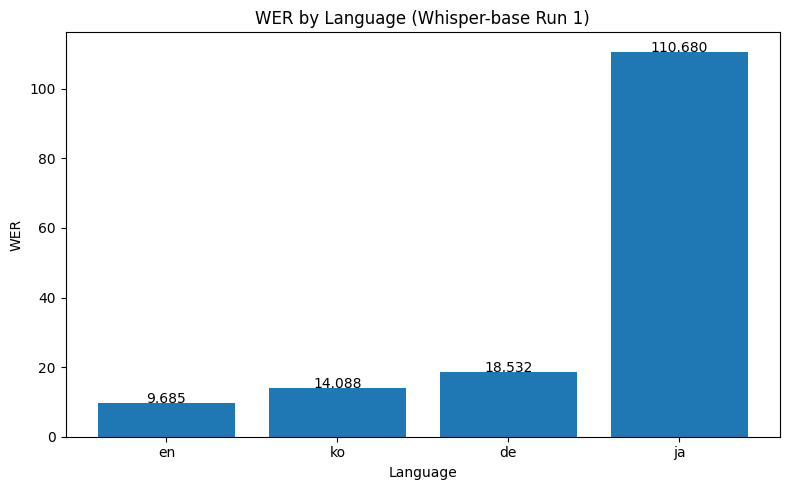

In [10]:
import matplotlib.pyplot as plt
import numpy as np

print("\n📊 WER 결과 (낮을수록 정확)")
for lang, score in sorted(lang_wer_results.items(), key=lambda x: x[1]):
    print(f"{lang.upper()} : {score:.4f}")

langs_sorted = [x[0] for x in sorted(lang_wer_results.items(), key=lambda x: x[1])]
scores_sorted = [x[1] for x in sorted(lang_wer_results.items(), key=lambda x: x[1])]

plt.figure(figsize=(8,5))
plt.bar(langs_sorted, scores_sorted)
plt.title("WER by Language (Whisper-base Run 1)")
plt.xlabel("Language")
plt.ylabel("WER")

for i, v in enumerate(scores_sorted):
    plt.text(i, v + 0.01, f"{v:.3f}", ha='center')

plt.tight_layout()
plt.savefig("wer_tiny_base.png")
plt.show()